In [ ]:
from get_gene_bank import *
positions = get_positions_gb("../reference/SARS_CoV_2_Wuhan_Hu_1_MN908947.gb")


In [ ]:
from Bio import SeqIO

new_consensus = {}

for gene in positions:
    new_consensus[gene[0]] = {}
    for pos in gene[1]:
        #print(f"This is {gene[0]} with the pos {pos[0], pos[1]}") #This is orf1ab with the pos (265, 13468)
        for record in SeqIO.parse("../projects/insaflu_comp_1/main_result/mafft/mafft_masked.fasta", "fasta"):
            try:
                new_consensus[gene[0]][record.id] += record.seq[pos[0]:pos[1]]
            except:
                new_consensus[gene[0]][record.id] = record.seq[pos[0]:pos[1]]
    print(new_consensus)

In [ ]:

#with translate
from get_gene_bank import *
positions = get_positions_gb("../reference/SARS_CoV_2_Wuhan_Hu_1_MN908947.gb")

from Bio import SeqIO
from Bio.Seq import Seq
new_consensus = {}

for gene in positions:
    new_consensus[gene[0]] = {}
    for pos in gene[1]:
        #print(f"This is {gene[0]} with the pos {pos[0], pos[1]}") #This is orf1ab with the pos (265, 13468)
        for record in SeqIO.parse("../projects/insaflu_comp_1/main_result/mafft/mafft_masked.fasta", "fasta"):
            # try:
            #     new_consensus[gene[0]][record.id] += record.seq[pos[0]:pos[1]].translate()
            # except:
            print(record.id)
            new_consensus[gene[0]][record.id] = record.seq[pos[0]:pos[1]]
            print(new_consensus[gene[0]][record.id])

In [ ]:
def write_fasta(dictionary, filename):
    import textwrap
    with open(filename, "w") as fasta:
        for key, value in dictionary.items():
            fasta.write(f">{key}\n")
            fasta.write("\n".join(textwrap.wrap(str(value), 70)))
            fasta.write("\n")
    print(f"{filename} out!")
            


In [ ]:
for gene in new_consensus:
    write_fasta(new_consensus[gene], 'testfolder/'+gene+'.fasta')

In [ ]:
for gene in new_consensus:
    for id in new_consensus[gene]:
        new_consensus[gene][id] = new_consensus[gene][id].translate()
        print(new_consensus[gene][id])
    write_fasta(new_consensus[gene], 'testfolder/'+gene+'aa.fasta')

In [ ]:
new_consensus['orf1ab']['SARS_CoV_2'].translate()

In [ ]:
import get_gene_bank as ggb
positions = ggb.get_positions_gb("reference/SARS_CoV_2_Wuhan_Hu_1_MN908947.gb")
positions

In [ ]:
genbank_file = "reference/SARS_CoV_2_Wuhan_Hu_1_MN908947.gb"


positions = []
handle_gb = open(genbank_file)
# for record in SeqIO.parse(handle_gb, "genbank"):
#     for features in record.features:
#         if (features.type == 'CDS'):
#             positions.append([features.qualifiers["gene"][0], features.location])


# positions_clean = []

# for idx,gene in enumerate(positions):
#     positions_clean.append([gene[0],[]])
#     for part in gene[1].parts:
#         positions_clean[idx][1].append([int(part.start),int(part.end)]) 
# print(positions_clean)

In [3]:
from Bio import SeqIO


genbank_file = "../reference/SARS_CoV_2_Wuhan_Hu_1_MN908947.gb"

positions = []

handle_gb = open(genbank_file)
for record in SeqIO.parse(handle_gb, "genbank"):
    for features in record.features:
        if (features.type == 'CDS'):
            positions.append([features.qualifiers["gene"][0], features.location])

positions_clean = []

for idx,gene in enumerate(positions):
    positions_clean.append([gene[0],[]])
    for part in gene[1].parts:
        positions_clean[idx][1].append([int(part.start),int(part.end)]) 
handle_gb.close()
print(positions_clean)

[['orf1ab', [[265, 13468], [13467, 21555]]], ['S', [[21562, 25384]]], ['ORF3a', [[25392, 26220]]], ['E', [[26244, 26472]]], ['M', [[26522, 27191]]], ['ORF6', [[27201, 27387]]], ['ORF7a', [[27393, 27759]]], ['ORF8', [[27893, 28259]]], ['N', [[28273, 29533]]], ['ORF10', [[29557, 29674]]]]


In [10]:
import sys
from Bio import SeqIO

def get_locus(genbank_file,possible_name):
    count = 0
    locus = []
    handle_gb = open(genbank_file)
    for record in SeqIO.parse(handle_gb, "genbank"):
        locus.append(count)
        count+=1
    handle_gb.close()
    if len(locus) == 1:
        return possible_name
    else:
        return locus

#get_locus("/home/reusebio/tese/insaflu_snakemake/reference/B_Vic_B_Brisbane_60_2008.gbk",'flu')
get_locus("/home/reusebio/tese/insaflu_snakemake/reference/SARS_CoV_2_Wuhan_Hu_1_MN908947.gb",'flu')

'flu'

In [53]:
from Bio import SeqIO


genbank_file = "../reference/SARS_CoV_2_Wuhan_Hu_1_MN908947.gb"

positions = []

handle_gb = open(genbank_file)
for record in SeqIO.parse(handle_gb, "genbank"):
    for features in record.features:
        if (features.type == 'CDS'):
            positions.append(features.qualifiers["translation"])
ref = positions[0][0]

trans = []

handle_gb = open("/home/reusebio/tese/insaflu_snakemake/projects/insaflu_2/main_result/SARS_CoV_2/Alignment_aa_SARS_CoV_2_orf1ab_mafft.fasta")
for record in SeqIO.parse(handle_gb, "fasta"):
    print(record.seq)
    trans.append(record.seq)

print(len(trans[0][:-1]), len(ref))

if ref == trans[0][:-1]:
    print(True)
else:
    print(False)

MESLVPGFNEKTHVQLSLPVLQVRDVLVRGFGDSVEEVLSEARQHLKDGTCGLVEVEKGVLPQLEQPYVFIKRSDARTAPHGHVMVELVAELEGIQYGRSGETLGVLVPHVGEIPVAYRKVLLRKNGNKGAGGHSYGADLKSFDLGDELGTDPYEDFQENWNTKHSSGVTRELMRELNGGAYTRYVDNNFCGPDGYPLECIKDLLARAGKASCTLSEQLDFIDTKRGVYCCREHEHEIAWYTERSEKSYELQTPFEIKLAKKFDTFNGECPNFVFPLNSIIKTIQPRVEKKKLDGFMGRIRSVYPVASPNECNQMCLSTLMKCDHCGETSWQTGDFVKATCEFCGTENLTKEGATTCGYLPQNAVVKIYCPACHNSEVGPEHSLAEYHNESGLKTILRKGGRTIAFGGCVFSYVGCHNKCAYWVPRASANIGCNHTGVVGEGSEGLNDNLLEILQKEKVNINIVGDFKLNEEIAIILASFSASTSAFVETVKGLDYKAFKQIVESCGNFKVTKGKAKKGAWNIGEQKSILSPLYAFASEAARVVRSIFSRTLETAQNSVRVLQKAAITILDGISQYSLRLIDAMMFTSDLATNNLVVMAYITGGVVQLTSQWLTNIFGTVYEKLKPVLDWLEEKFKEGVEFLRDGWEIVKFISTCACEIVGGQIVTCAKEIKESVQTFFKLVNKFLALCADSIIIGGAKLKALNLGETFVTHSKGLYRKCVKSREETGLLMPLKAPKEIIFLEGETLPTEVLTEEVVLKTGDLQPLEQPTSEAVEAPLVGTPVCINGLMLLEIKDTEKYCALAPNMMVTNNTFTLKGGAPTKVTFGDDTVIEVQGYKSVNITFELDERIDKVLNEKCSAYTVELGTEVNEFACVVADAVIKTLQPVSELLTPLGIDLDEWSMATYYLFDESGEFKLASHMYCSFYPPDEDEEEGDCEEEEFEPSTQYEYGTEDDYQGKPLEFGATSAALQPEEEQEEDWLDDDSQQTVGQQDGSEDNQTT

In [2]:

import sys
from Bio import SeqIO
import get_gene_bank as ggb 

reference = "../reference/SARS_CoV_2_Wuhan_Hu_1_MN908947.gb"
consensus = "../projects/insaflu_bigger/main_result/mafft/mafft_masked.fasta"

positions = ggb.get_positions_gb(reference)
new_consensus = {}
for gene in positions:
    new_consensus[gene[0]] = {}
    for pos in gene[1]:
        #print(f"This is {gene[0]} with the pos {pos[0], pos[1]}") #This is orf1ab with the pos (265, 13468)
        for record in SeqIO.parse(consensus, "fasta"):
            #need to find new solution to this problem
            #the final aa alignment has no gaps due to error in this segment of the pipline
            try:
                #new_consensus[gene[0]][record.id] += record.seq[pos[0]:pos[1]].replace('-','N').translate(table=11, gap='-',to_stop=False)

                new_consensus[gene[0]][record.id] += record.seq[pos[0]:pos[1]].replace('-','').translate(table=11, gap='-',to_stop=False)
            except:
                new_consensus[gene[0]][record.id] = record.seq[pos[0]:pos[1]].replace('-','').translate(table=11, gap='-',to_stop=False)
new_consensus

FileNotFoundError: [Errno 2] No such file or directory: '../projects/insaflu_bigger/main_result/mafft/mafft_masked.fasta'

In [24]:
gb = "../reference/SARS_CoV_2_Wuhan_Hu_1_MN908947.gb"
consensus = "../projects/insaflu_new_translate/main_result/mafft/mafft_masked.fasta"
positions = ggb.get_positions_gb(reference)
print(positions)
def get_ref_adjusted_positions(fasta, positions): 
    ref = list(SeqIO.parse(consensus, "fasta"))[0].seq
    for gene in positions:
        for group in gene[1]:
            n_gaps = ref[:group[0]].count('-')
            group[0] += n_gaps
            group[1] += n_gaps
    return positions

[['orf1ab', [[265, 13468], [13467, 21555]]], ['S', [[21562, 25384]]], ['ORF3a', [[25392, 26220]]], ['E', [[26244, 26472]]], ['M', [[26522, 27191]]], ['ORF6', [[27201, 27387]]], ['ORF7a', [[27393, 27759]]], ['ORF8', [[27893, 28259]]], ['N', [[28273, 29533]]], ['ORF10', [[29557, 29674]]]]


[['orf1ab', [[332, 13535], [17482, 25570]]],
 ['S', [[28058, 31880]]],
 ['ORF3a', [[33016, 33844]]],
 ['E', [[34101, 34329]]],
 ['M', [[34443, 35112]]],
 ['ORF6', [[35297, 35483]]],
 ['ORF7a', [[35560, 35926]]],
 ['ORF8', [[36200, 36566]]],
 ['N', [[36690, 37950]]],
 ['ORF10', [[38383, 38500]]]]

In [31]:
import sys
from Bio import SeqIO


genes = []
#genbank_file = "../reference/A_H1N1pdm09_A_Michigan_45_2015.gbk"
genbank_file = "../reference/SARS_CoV_2_Wuhan_Hu_1_MN908947.gb"
def get_locus_protein(genbank_file,possible_name):
    locus_protein = []
    handle_gb = open(genbank_file)
    for record in SeqIO.parse(handle_gb, "genbank"):
        for features in record.features:
            if (features.type == 'CDS'):
                try:
                    a = features.qualifiers["locus_tag"]
                    locus_protein.append(f"{int(features.qualifiers['locus_tag'][0][-5:])}_{features.qualifiers['gene'][0]}")
                except:
                    locus_protein.append(f"{possible_name}_{features.qualifiers['gene'][0]}")
    handle_gb.close()
    return locus_protein

print(get_locus_protein(genbank_file, 'SARS_CoV_2'))

def get_locus(genbank_file,possible_name):
    locus = []
    handle_gb = open(genbank_file)
    for record in SeqIO.parse(handle_gb, "genbank"):
        for features in record.features:
            if (features.type == 'CDS'):
                try:
                    a = features.qualifiers["locus_tag"]
                    locus.append(f"{int(features.qualifiers['locus_tag'][0][-5:])}")
                except:
                    return possible_name
    handle_gb.close()
    return locus

print(get_locus(genbank_file, 'SARS_CoV_2'))



['SARS_CoV_2_orf1ab', 'SARS_CoV_2_S', 'SARS_CoV_2_ORF3a', 'SARS_CoV_2_E', 'SARS_CoV_2_M', 'SARS_CoV_2_ORF6', 'SARS_CoV_2_ORF7a', 'SARS_CoV_2_ORF8', 'SARS_CoV_2_N', 'SARS_CoV_2_ORF10']
SARS_CoV_2


In [34]:
new_file = []
for record in SeqIO.parse("../projects/first_flu/sample_SRR10885406/snippy/snps.consensus.fa", "fasta"):
    record.id = "SampleX" + record.id
    new_file.append(record)
SeqIO.write(new_file, "short_seqs.fasta", "fasta")

8

In [40]:
a = "hello/there/my/name/is/G"
last_pos = len(a) - a[::-1].index("/")
print(last_pos)
print(a[last_pos])

23
G


In [29]:
import sys
from Bio import SeqIO

alignment ="../projects/first_flu/main_result/mafft/Alignment_nt_All.fasta"
outdir = sys.argv[3]
counter = 0
loop = 8
list_of_segments = [[] for x in range(loop)]

for record in SeqIO.parse(alignment, "fasta"):
    if counter == loop:
        counter = 0
    #print(counter)
    list_of_segments[counter].append(record)
    counter+=1

for i in range(loop):
    #print(i)
    SeqIO.write(list_of_segments[i], f"{outdir}/{i+1}/Alignment_nt_{i+1}.fasta", "fasta")




In [15]:
import csv
import re

n_locus = 1
filename = '../projects/covid/main_result/coverage/ERR10039718_coverage.csv'
def get_coverage(filename):
    with open(filename, newline='') as csvfile:
        csv_reader = csv.reader(csvfile, delimiter='\t')
        x = re.findall("(?<=coverage/)(.*?)(?=_coverage.csv)",filename)
        coverage_list = list(csv_reader)[-1][-n_locus:]
        coverage_list.insert(0,x[0])
        return coverage_list

get_coverage(filename)
        

['ERR10039718', '94.9']

In [18]:
string = "Rodrigo__1"
string[:string.index("__1")]

'Rodrigo'

In [21]:
list = [[0,1,2,3],[10,0,1,2,3]]
dic = {}
for i in list:
    dic[i[0]] = i[1:]
print(dic)

{0: [1, 2, 3], 10: [0, 1, 2, 3]}


In [45]:
import csv
coverage_file = "../projects/flu_testing/main_result/coverage_translate.csv"
def get_locus_w_coverage(coverage_file):
    with open(coverage_file, newline='') as csvfile:
        csv_reader = csv.reader(csvfile, delimiter=',')
        coverage_list = list(csv_reader)
        size = len(coverage_list[0])
        final_output = []
        for times in range(1,size):
            for sample in coverage_list:
                print(float(sample[times]))
                if float(sample[times]) >= 90.0:
                    final_output.append(times)
                    break
    return final_output
get_locus_w_coverage(coverage_file)

90.0
0.0
0.0
0.0
0.0
0.0
90.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0


[1, 4]

In [9]:
a =""">SARS_CoV_2 MN908947 Severe acute respiratory syndrome coronavirus 2 isolate Wuhan-Hu-1, complete genome
ATTAAAGGTTTATACCTTCCCAGGTAACAAACCAACCAACTTTCGATCTCTTGTAGATCT
GTTCTCTAAACGAACTTTAAAATCTGTGTGGCTGTCACTCGGCTGCATGCTTAGTGCACT
CACGCAGTATAATTAATAACTAATTACTGTCGTTGACAGGACACGAGTAACTCGTCTATC
TTCTGCAGGCTGCTTACGGTTTCGTCCGTGTTGCAGCCGATCATCAGCACATCTAGGTTT
CGTCCGGGTGTGACCGAAAGGTAAGATGGAGAGCCTTGTCCCTGGTTTCAACGAGAAAAC
ACACGTCCAACTCAGTTTGCCTGTTTTACAGGTTCGCGACGTGCTCGTACGTGGCTTTGG
AGACTCCGTGGAGGAGGTCTTATCAGAGGCACGTCAACATCTTAAAGATGGCACTTGTGG
CTTAGTAGAAGTTGAAAAAGGCGTTTTGCCTCAACTTGAACAGCCCTATGTGTTCATCAA
ACGTTCGGATGCTCGAACTGCACCTCATGGTCATGTTATGGTTGAGCTGGTAGCAGAACT
CGAAGGCATTCAGTACGGTCGTAGTGGTGAGACACTTGGTGTCCTTGTCCCTCATGTGGG
CGAAATACCAGTGGCTTACCGCAAGGTTCTTCTTCGTAAGAACGGTAATAAAGGAGCTGG
TGGCCATAGTTACGGCGCCGATCTAAAGTCATTTGACTTAGGCGACGAGCTTGGCACTGA
TCCTTATGAAGATTTTCAAGAAAACTGGAACACTAAACATAGCAGTGGTGTTACCCGTGA
ACTCATGCGTGAGCTTAACGGAGGGGCATACACTCGCTATGTCGATAACAACTTCTGTGG
CCCTGATGGCTACCCTCTTGAGTGCATTAAAGACCTTCTAGCACGTGCTGGTAAAGCTTC
ATGCACTTTGTCCGAACAACTGGACTTTATTGACACTAAGAGGGGTGTATACTGCTGCCG
TGAACATGAGCATGAAATTGCTTGGTACACGGAACGTTCTGAAAAGAGCTATGAATTGCA
GACACCTTTTGAAATTAAATTGGCAAAGAAATTTGACACCTTCAATGGGGAATGTCCAAA
TTTTGTATTTCCCTTAAATTCCATAATCAAGACTATTCAACCAAGGGTTGAAAAGAAAAA
GCTTGATGGCTTTATGGGTAGAATTCGATCTGTCTATCCAGTTGCGTCACCAAATGAATG
CAACCAAATGTGCCTTTCAACTCTCATGAAGTGTGATCATTGTGGTGAAACTTCATGGCA
GACGGGCGATTTTGTTAAAGCCACTTGCGAATTTTGTGGCACTGAGAATTTGACTAAAGA
AGGTGCCACTACTTGTGGTTACTTACCCCAAAATGCTGTTGTTAAAATTTATTGTCCAGC
ATGTCACAATTCAGAAGTAGGACCTGAGCATAGTCTTGCCGAATACCATAATGAATCTGG
CTTGAAAACCATTCTTCGTAAGGGTGGTCGCACTATTGCCTTTGGAGGCTGTGTGTTCTC
TTATGTTGGTTGCCATAACAAGTGTGCCTATTGGGTTCCACGTGCTAGCGCTAACATAGG
TTGTAACCATACAGGTGTTGTTGGAGAAGGTTCCGAAGGTCTTAATGACAACCTTCTTGA
AATACTCCAAAAAGAGAAAGTCAACATCAATATTGTTGGTGACTTTAAACTTAATGAAGA
GATCGCCATTATTTTGGCATCTTTTTCTGCTTCCACAAGTGCTTTTGTGGAAACTGTGAA
AGGTTTGGATTATAAAGCATTCAAACAAATTGTTGAATCCTGTGGTAATTTTAAAGTTAC
AAAAGGAAAAGCTAAAAAAGGTGCCTGGAATATTGGTGAACAGAAATCAATACTGAGTCC
TCTTTATGCATTTGCATCAGAGGCTGCTCGTGTTGTACGATCAATTTTCTCCCGCACTCT
TGAAACTGCTCAAAATTCTGTGCGTGTTTTACAGAAGGCCGCTATAACAATACTAGATGG
AATTTCACAGTATTCACTGAGACTCATTGATGCTATGATGTTCACATCTGATTTGGCTAC
TAACAATCTAGTTGTAATGGCCTACATTACAGGTGGTGTTGTTCAGTTGACTTCGCAGTG
GCTAACTAACATCTTTGGCACTGTTTATGAAAAACTCAAACCCGTCCTTGATTGGCTTGA
AGAGAAGTTTAAGGAAGGTGTAGAGTTTCTTAGAGACGGTTGGGAAATTGTTAAATTTAT
CTCAACCTGTGCTTGTGAAATTGTCGGTGGACAAATTGTCACCTGTGCAAAGGAAATTAA
GGAGAGTGTTCAGACATTCTTTAAGCTTGT
AAATAAATTTTTGGCTTTGTGTGCTGACTCTATCATTATTGGTGGAGCTAAACTTAAAGCCTTGAATTTA
GGTGAAACATTTGTCACGCACTCAAAGGGATTGTACAGAAAGTGTGTTAAATCCAGAGAAGAAACTGGCC
TACTCATGCCTCTAAAAGCCCCAAAAGAAATTATCTTCTTAGAGGGAGAAACACTTCCCACAGAAGTGTT
AACAGAGGAAGTTGTCTTGAAAACTGGTGATTTACAACCATTAGAACAACCTACTAGTGAAGCTGTTGAA
GCTCCATTGGTTGGTACACCAGTTTGTATTAACGGGCTTATGTTGCTCGAAATCAAAGACACAGAAAAGT
ACTGTGCCCTTGCACCTAATATGATGGTAACAAACAATACCTTCACACTCAAAGGCGGTGCACCAACAAA
GGTTACTTTTGGTGATGACACTGTGATAGAAGTGCAAGGTTACAAGAGTGTGAATATCACTTTTGAACTT
GATGAAAGGATTGATAAAGTACTTAATGAGAAGTGCTCTGCCTATACAGTTGAACTCGGTACAGAAGTAA
ATGAGTTCGCCTGTGTTGTGGCAGATGCTGTCATAAAAACTTTGCAACCAGTATCTGAATTACTTACACC
ACTGGGCATTGATTTAGATGAGTGGAGTATGGCTACATACTACTTATTTGATGAGTCTGGTGAGTTTAAA
TTGGCTTCACATATGTATTGTTCTTTCTACCCTCCAGATGAGGATGAAGAAGAAGGTGATTGTGAAGAAG
AAGAGTTTGAGCCATCAACTCAATATGAGTATGGTACTGAAGATGATTACCAAGGTAAACCTTTGGAATT
TGGTGCCACTTCTGCTGCTCTTCAACCTGAAGAAGAGCAAGAAGAAGATTGGTTAGATGATGATAGTCAA
CAAACTGTTGGTCAACAAGACGGCAGTGAGGACAATCAGACAACTACTATTCAAACAATTGTTGAGGTTC
AACCTCAATTAGAGATGGAACTTACACCAGTTGTTCAGACTATTGAAGTGAATAGTTTTAGTGGTTATTT
AAAACTTACTGACAATGTATACATTAAAAATGCAGACATTGTGGAAGAAGCTAAAAAGGTAAAACCAACA
GTGGTTGTTAATGCAGCCAATGTTTACCTTAAACATGGAGGAGGTGTTGCAGGAGCCTTAAATAAGGCTA
CTAACAATGCCATGCAAGTTGAATCTGATGATTACATAGCTACTAATGGACCACTTAAAGTGGGTGGTAG
TTGTGTTTTAAGCGGACACAATCTTGCTAAACACTGTCTTCATGTTGTCGGCCCAAATGTTAACAAAGGT
GAAGACATTCAACTTCTTAAGAGTGCTTATGAAAATTTTAATCAGCACGAAGTTCTACTTGCACCATTAT
TATCAGCTGGTATTTTTGGTGCTGACCCTATACATTCTTTAAGAGTTTGTGTAGATACTGTTCGCACAAA
TGTCTACTTAGCTGTCTTTGATAAAAATCTCTATGACAAACTTGTTTCAAGCTTTTTGGAAATGAAGAGT
GAAAAGCAAGTTGAACAAAAGATCGCTGAGATTCCTAAAGAGGAAGTTAAGCCATTTATAACTGAAAGTA
AACCTTCAGTTGAACAGAGAAAACAAGATGATAAGAAAATCAAAGCTTGTGTTGAAGAAGTTACAACAAC
TCTGGAAGAAACTAAGTTCCTCACAGAAAACTTGTTACTTTATATTGACATTAATGGCAATCTTCATCCA
GATTCTGCCACTCTTGTTAGTGACATTGACATCACTTTCTTAAAGAAAGATGCTCCATATATAGTGGGTG
ATGTTGTTCAAGAGGGTGTTTTAACTGCTGTGGTTATACCTACTAAAAAGGCTGGTGGCACTACTGAAAT
GCTAGCGAAAGCTTTGAGAAAAGTGCCAACAGACAATTATATAACCACTTACCCGGGTCAGGGTTTAAAT
GGTTACACTGTAGAGGAGGCAAAGACAGTGCTTAAAAAGTGTAAAAGTGCCTTTTACATTCTACCATCTA
TTATCTCTAATGAGAAGCAAGAAATTCTTGGAACTGTTTCTTGGAATTTGCGAGAAATGCTTGCACATGC
AGAAGAAACACGCAAATTAATGCCTGTCTGTGTGGAAACTAAAGCCATAGTTTCAACTATACAGCGTAAA
TATAAGGGTATTAAAATACAAGAGGGTGTGGTTGATTATGGTGCTAGATTTTACTTTTACACCAGTAAAA
CAACTGTAGCGTCACTTATCAACACACTTAACGATCTAAATGAAACTCTTGTTACAATGCCACTTGGCTA
TGTAACACATGGCTTAAATTTGGAAGAAGCTGCTCGGTATATGAGATCTCTCAAAGTGCCAGCTACAGTT
TCTGTTTCTTCACCTGATGCTGTTACAGCGTATAATGGTTATCTTACTTCTTCTTCTAAAACACCTGAAG
AACATTTTATTGAAACCATCTCACTTGCTGGTTCCTATAAAGATTGGTCCTATTCTGGACAATCTACACA
ACTAGGTATAGAATTTCTTAAGAGAGGTGATAAAAGTGTATATTACACTAGTAATCCTACCACATTCCAC
CTAGATGGTGAAGTTATCACCTTTGACAATCTTAAGACACTTCTTTCTTTGAGAGAAGTGAGGACTATTA
AGGTGTTTACAACAGTAGACAACATTAACCTCCACACGCAAGTTGTGGACATGTCAATGACATATGGACA
ACAGTTTGGTCCAACTTATTTGGATGGAGCTGATGTTACTAAAATAAAACCTCATAATTCACATGAAGGT
AAAACATTTTATGTTTTACCTAATGATGACACTCTACGTGTTGAGGCTTTTGAGTACTACCACACAACTG
ATCCTAGTTTTCTGGGTAGGTACATGTCAGCATTAAATCACACTAAAAAGTGGAAATACCCACAAGTTAA
TGGTTTAACTTCTATTAAATGGGCAGATAACAACTGTTATCTTGCCACTGCATTGTTAACACTCCAACAA
ATAGAGTTGAAGTTTAATCCACCTGCTCTACAAGATGCTTATTACAGAGCAAGGGCTGGTGAAGCTGCTA
ACTTTTGTGCACTTATCTTAGCCTACTGTAATAAGACAGTAGGTGAGTTAGGTGATGTTAGAGAAACAAT
GAGTTACTTGTTTCAACATGCCAATTTAGATTCTTGCAAAAGAGTCTTGAACGTGGTGTGTAAAACTTGT
GGACAACAGCAGACAACCCTTAAGGGTGTAGAAGCTGTTATGTACATGGGCACACTTTCTTATGAACAAT
TTAAGAAAGGTGTTCAGATACCTTGTACGTGTGGTAAACAAGCTACAAAATATCTAGTACAACAGGAGTC
ACCTTTTGTTATGATGTCAGCACCACCTGCTCAGTATGAACTTAAGCATGGTACATTTACTTGTGCTAGT
GAGTACACTGGTAATTACCAGTGTGGTCACTATAAACATATAACTTCTAAAGAAACTTTGTATTGCATAG
ACGGTGCTTTACTTACAAAGTCCTCAGAATACAAAGGTCCTATTACGGATGTTTTCTACAAAGAAAACAG
TTACACAACAACCATAAAACCAGTTACTTATAAATTGGATGGTGTTGTTTGTACAGAAATTGACCCTAAG
TTGGACAATTATTATAAGAAAGACAATTCTTATTTCACAGAGCAACCAATTGATCTTGTACCAAACCAAC
CATATCCAAACGCAAGCTTCGATAATTTTAAGTTTGTATGTGATAATATCAAATTTGCTGATGATTTAAA
CCAGTTAACTGGTTATAAGAAACCTGCTTCAAGAGAGCTTAAAGTTACATTTTTCCCTGACTTAAATGGT
GATGTGGTGGCTATTGATTATAAACACTACACACCCTCTTTTAAGAAAGGAGCTAAATTGTTACATAAAC
CTATTGTTTGGCATGTTAACAATGCAACTAATAAAGCCACGTATAAACCAAATACCTGGTGTATACGTTG
TCTTTGGAGCACAAAACCAGTTGAAACATCAAATTCGTTTGATGTACTGAAGTCAGAGGACGCGCAGGGA
ATGGATAATCTTGCCTGCGAAGATCTAAAACCAGTCTCTGAAGAAGTAGTGGAAAATCCTACCATACAGA
AAGACGTTCTTGAGTGTAATGTGAAAACTACCGAAGTTGTAGGAGACATTATACTTAAACCAGCAAATAA
TAGTTTAAAAATTACAGAAGAGGTTGGCCACACAGATCTAATGGCTGCTTATGTAGACAATTCTAGTCTT
ACTATTAAGAAACCTAATGAATTATCTAGAGTATTAGGTTTGAAAACCCTTGCTACTCATGGTTTAGCTG
CTGTTAATAGTGTCCCTTGGGATACTATAGCTAATTATGCTAAGCCTTTTCTTAACAAAGTTGTTAGTAC
AACTACTAACATAGTTACACGGTGTTTAAACCGTGTTTGTACTAATTATATGCCTTATTTCTTTACTTTA
TTGCTACAATTGTGTACTTTTACTAGAAGTACAAATTCTAGAATTAAAGCATCTATGCCGACTACTATAG
CAAAGAATACTGTTAAGAGTGTCGGTAAATTTTGTCTAGAGGCTTCATTTAATTATTTGAAGTCACCTAA
TTTTTCTAAACTGATAAATATTATAATTTGGTTTTTACTATTAAGTGTTTGCCTAGGTTCTTTAATCTAC
TCAACCGCTGCTTTAGGTGTTTTAATGTCTAATTTAGGCATGCCTTCTTACTGTACTGGTTACAGAGAAG
GCTATTTGAACTCTACTAATGTCACTATTGCAACCTACTGTACTGGTTCTATACCTTGTAGTGTTTGTCT
TAGTGGTTTAGATTCTTTAGACACCTATCCTTCTTTAGAAACTATACAAATTACCATTTCATCTTTTAAA
TGGGATTTAACTGCTTTTGGCTTAGTTGCAGAGTGGTTTTTGGCATATATTCTTTTCACTAGGTTTTTCT
ATGTACTTGGATTGGCTGCAATCATGCAATTGTTTTTCAGCTATTTTGCAGTACATTTTATTAGTAATTC
TTGGCTTATGTGGTTAATAATTAATCTTGTACAAATGGCCCCGATTTCAGCTATGGTTAGAATGTACATC
TTCTTTGCATCATTTTATTATGTATGGAAAAGTTATGTGCATGTTGTAGACGGTTGTAATTCATCAACTT
GTATGATGTGTTACAAACGTAATAGAGCAACAAGAGTCGAATGTACAACTATTGTTAATGGTGTTAGAAG
GTCCTTTTATGTCTATGCTAATGGAGGTAAAGGCTTTTGCAAACTACACAATTGGAATTGTGTTAATTGT
GATACATTCTGTGCTGGTAGTACATTTATTAGTGATGAAGTTGCGAGAGACTTGTCACTACAGTTTAAAA
GACCAATAAATCCTACTGACCAGTCTTCTTACATCGTTGATAGTGTTACAGTGAAGAATGGTTCCATCCA
TCTTTACTTTGATAAAGCTGGTCAAAAGACTTATGAAAGACATTCTCTCTCTCATTTTGTTAACTTAGAC
AACCTGAGAGCTAATAACACTAAAGGTTCATTGCCTATTAATGTTATAGTTTTTGATGGTAAATCAAAAT
GTGAAGAATCATCTGCAAAATCAGCGTCTGTTTACTACAGTCAGCTTATGTGTCAACCTATACTGTTACT
AGATCAGGCATTAGTGTCTGATGTTGGTGATAGTGCGGAAGTTGCAGTTAAAATGTTTGATGCTTACGTT
AATACGTTTTCATCAACTTTTAACGTACCAATGGAAAAACTCAAAACACTAGTTGCAACTGCAGAAGCTG
AACTTGCAAAGAATGTGTCCTTAGACAATGTCTTATCTACTTTTATTTCAGCAGCTCGGCAAGGGTTTGT
TGATTCAGATGTAGAAACTAAAGATGTTGTTGAATGTCTTAAATTGTCACATCAATCTGACATAGAAGTT
ACTGGCGATAGTTGTAATAACTATATGCTCACCTATAACAAAGTTGAAAACATGACACCCCGTGACCTTG
GTGCTTGTATTGACTGTAGTGCGCGTCATATTAATGCGCAGGTAGCAAAAAGTCACAACATTGCTTTGAT
ATGGAACGTTAAAGATTTCATGTCATTGTCTGAACAACTACGAAAACAAATACGTAGTGCTGCTAAAAAG
AATAACTTACCTTTTAAGTTGACATGTGCAACTACTAGACAAGTTGTTAATGTTGTAACAACAAAGATAG
CACTTAAGGGTGGTAAAATTGTTAATAATTGGTTGAAGCAGTTAATTAAAGTTACACTTGTGTTCCTTTT
TGTTGCTGCTATTTTCTATTTAATAACACCTGTTCATGTCATGTCTAAACATACTGACTTTTCAAGTGAA
ATCATAGGATACAAGGCTATTGATGGTGGTGTCACTCGTGACATAGCATCTACAGATACTTGTTTTGCTA
ACAAACATGCTGATTTTGACACATGGTTTAGCCAGCGTGGTGGTAGTTATACTAATGACAAAGCTTGCCC
ATTGATTGCTGCAGTCATAACAAGAGAAGTGGGTTTTGTCGTGCCTGGTTTGCCTGGCACGATATTACGC
ACAACTAATGGTGACTTTTTGCATTTCTTACCTAGAGTTTTTAGTGCAGTTGGTAACATCTGTTACACAC
CATCAAAACTTATAGAGTACACTGACTTTGCAACATCAGCTTGTGTTTTGGCTGCTGAATGTACAATTTT
TAAAGATGCTTCTGGTAAGCCAGTACCATATTGTTATGATACCAATGTACTAGAAGGTTCTGTTGCTTAT
GAAAGTTTACGCCCTGACACACGTTATGTGCTCATGGATGGCTCTATTATTCAATTTCCTAACACCTACC
TTGAAGGTTCTGTTAGAGTGGTAACAACTTTTGATTCTGAGTACTGTAGGCACGGCACTTGTGAAAGATC
AGAAGCTGGTGTTTGTGTATCTACTAGTGGTAGATGGGTACTTAACAATGATTATTACAGATCTTTACCA
GGAGTTTTCTGTGGTGTAGATGCTGTAAATTTACTTACTAATATGTTTACACCACTAATTCAACCTATTG
GTGCTTTGGACATATCAGCATCTATAGTAGCTGGTGGTATTGTAGCTATCGTAGTAACATGCCTTGCCTA
CTATTTTATGAGGTTTAGAAGAGCTTTTGGTGAATACAGTCATGTAGTTGCCTTTAATACTTTACTATTC
CTTATGTCATTCACTGTACTCTGTTTAACACCAGTTTACTCATTCTTACCTGGTGTTTATTCTGTTATTT
ACTTGTACTTGACATTTTATCTTACTAATGATGTTTCTTTTTTAGCACATATTCAGTGGATGGTTATGTT
CACACCTTTAGTACCTTTCTGGATAACAATTGCTTATATCATTTGTATTTCCACAAAGCATTTCTATTGG
TTCTTTAGTAATTACCTAAAGAGACGTGTAGTCTTTAATGGTGTTTCCTTTAGTACTTTTGAAGAAGCTG
CGCTGTGCACCTTTTTGTTAAATAAAGAAATGTATCTAAAGTTGCGTAGTGATGTGCTATTACCTCTTAC
GCAATATAATAGATACTTAGCTCTTTATAATAAGTACAAGTATTTTAGTGGAGCAATGGATACAACTAGC
TACAGAGAAGCTGCTTGTTGTCATCTCGCAAAGGCTCTCAATGACTTCAGTAACTCAGGTTCTGATGTTC
TTTACCAACCACCACAAACCTCTATCACCTCAGCTGTTTTGCAGAGTGGTTTTAGAAAAATGGCATTCCC
ATCTGGTAAAGTTGAGGGTTGTATGGTACAAGTAACTTGTGGTACAACTACACTTAACGGTCTTTGGCTT
GATGACGTAGTTTACTGTCCAAGACATGTGATCTGCACCTCTGAAGACATGCTTAACCCTAATTATGAAG
ATTTACTCATTCGTAAGTCTAATCATAATTTCTTGGTACAGGCTGGTAATGTTCAACTCAGGGTTATTGG
ACATTCTATGCAAAATTGTGTACTTAAGCTTAAGGTTGATACAGCCAATCCTAAGACACCTAAGTATAAG
TTTGTTCGCATTCAACCAGGACAGACTTTTTCAGTGTTAGCTTGTTACAATGGTTCACCATCTGGTGTTT
ACCAATGTGCTATGAGGCCCAATTTCACTATTAAGGGTTCATTCCTTAATGGTTCATGTGGTAGTGTTGG
TTTTAACATAGATTATGACTGTGTCTCTTTTTGTTACATGCACCATATGGAATTACCAACTGGAGTTCAT
GCTGGCACAGACTTAGAAGGTAACTTTTATGGACCTTTTGTTGACAGGCAAACAGCACAAGCAGCTGGTA
CGGACACAACTATTACAGTTAATGTTTTAGCTTGGTTGTACGCTGCTGTTATAAATGGAGACAGGTGGTT
TCTCAATCGATTTACCACAACTCTTAATGACTTTAACCTTGTGGCTATGAAGTACAATTATGAACCTCTA
ACACAAGACCATGTTGACATACTAGGACCTCTTTCTGCTCAAACTGGAATTGCCGTTTTAGATATGTGTG
CTTCATTAAAAGAATTACTGCAAAATGGTATGAATGGACGTACCATATTGGGTAGTGCTTTATTAGAAGA
TGAATTTACACCTTTTGATGTTGTTAGACAATGCTCAGGTGTTACTTTCCAAAGTGCAGTGAAAAGAACA
ATCAAGGGTACACACCACTGGTTGTTACTCACAATTTTGACTTCACTTTTAGTTTTAGTCCAGAGTACTC
AATGGTCTTTGTTCTTTTTTTTGTATGAAAATGCCTTTTTACCTTTTGCTATGGGTATTATTGCTATGTC
TGCTTTTGCAATGATGTTTGTCAAACATAAGCATGCATTTCTCTGTTTGTTTTTGTTACCTTCTCTTGCC
ACTGTAGCTTATTTTAATATGGTCTATATGCCTGCTAGTTGGGTGATGCGTATTATGACATGGTTGGATA
TGGTTGATACTAGTTTGTCTGGTTTTAAGCTAAAAGACTGTGTTATGTATGCATCAGCTGTAGTGTTACT
AATCCTTATGACAGCAAGAACTGTGTATGATGATGGTGCTAGGAGAGTGTGGACACTTATGAATGTCTTG
ACACTCGTTTATAAAGTTTATTATGGTAATGCTTTAGATCAAGCCATTTCCATGTGGGCTCTTATAATCT
CTGTTACTTCTAACTACTCAGGTGTAGTTACAACTGTCATGTTTTTGGCCAGAGGTATTGTTTTTATGTG
TGTTGAGTATTGCCCTATTTTCTTCATAACTGGTAATACACTTCAGTGTATAATGCTAGTTTATTGTTTC
TTAGGCTATTTTTGTACTTGTTACTTTGGCCTCTTTTGTTTACTCAACCGCTACTTTAGACTGACTCTTG
GTGTTTATGATTACTTAGTTTCTACACAGGAGTTTAGATATATGAATTCACAGGGACTACTCCCACCCAA
GAATAGCATAGATGCCTTCAAACTCAACATTAAATTGTTGGGTGTTGGTGGCAAACCTTGTATCAAAGTA
GCCACTGTACAGTCTAAAATGTCAGATGTAAAGTGCACATCAGTAGTCTTACTCTCAGTTTTGCAACAAC
TCAGAGTAGAATCATCATCTAAATTGTGGGCTCAATGTGTCCAGTTACACAATGACATTCTCTTAGCTAA
AGATACTACTGAAGCCTTTGAAAAAATGGTTTCACTACTTTCTGTTTTGCTTTCCATGCAGGGTGCTGTA
GACATAAACAAGCTTTGTGAAGAAATGCTGGACAACAGGGCAACCTTACAAGCTATAGCCTCAGAGTTTA
GTTCCCTTCCATCATATGCAGCTTTTGCTACTGCTCAAGAAGCTTATGAGCAGGCTGTTGCTAATGGTGA
TTCTGAAGTTGTTCTTAAAAAGTTGAAGAAGTCTTTGAATGTGGCTAAATCTGAATTTGACCGTGATGCA
GCCATGCAACGTAAGTTGGAAAAGATGGCTGATCAAGCTATGACCCAAATGTATAAACAGGCTAGATCTG
AGGACAAGAGGGCAAAAGTTACTAGTGCTATGCAGACAATGCTTTTCACTATGCTTAGAAAGTTGGATAA
TGATGCACTCAACAACATTATCAACAATGCAAGAGATGGTTGTGTTCCCTTGAACATAATACCTCTTACA
ACAGCAGCCAAACTAATGGTTGTCATACCAGACTATAACACATATAAAAATACGTGTGATGGTACAACAT
TTACTTATGCATCAGCATTGTGGGAAATCCAACAGGTTGTAGATGCAGATAGTAAAATTGTTCAACTTAG
TGAAATTAGTATGGACAATTCACCTAATTTAGCATGGCCTCTTATTGTAACAGCTTTAAGGGCCAATTCT
GCTGTCAAATTACAGAATAATGAGCTTAGTCCTGTTGCACTACGACAGATGTCTTGTGCTGCCGGTACTA
CACAAACTGCTTGCACTGATGACAATGCGTTAGCTTACTACAACACAACAAAGGGAGGTAGGTTTGTACT
TGCACTGTTATCCGATTTACAGGATTTGAAATGGGCTAGATTCCCTAAGAGTGATGGAACTGGTACTATC
TATACAGAACTGGAACCACCTTGTAGGTTTGTTACAGACACACCTAAAGGTCCTAAAGTGAAGTATTTAT
ACTTTATTAAAGGATTAAACAACCTAAATAGAGGTATGGTACTTGGTAGTTTAGCTGCCACAGTACGTCT
ACAAGCTGGTAATGCAACAGAAGTGCCTGCCAATTCAACTGTATTATCTTTCTGTGCTTTTGCTGTAGAT
GCTGCTAAAGCTTACAAAGATTATCTAGCTAGTGGGGGACAACCAATCACTAATTGTGTTAAGATGTTGT
GTACACACACTGGTACTGGTCAGGCAATAACAGTTACACCGGAAGCCAATATGGATCAAGAATCCTTTGG
TGGTGCATCGTGTTGTCTGTACTGCCGTTGCCACATAGATCATCCAAATCCTAAAGGATTTTGTGACTTA
AAAGGTAAGTATGTACAAATACCTACAACTTGTGCTAATGACCCTGTGGGTTTTACACTTAAAAACACAG
TCTGTACCGTCTGCGGTATGTGGAAAGGTTATGGCTGTAGTTGTGATCAACTCCGCGAACCCATGCTTCA
GTCAGCTGATGCACAATCGTTTTTAAACGGGTTTGCGGTGTAAGTGCAGCCCGTCTTACACCGTGCGGCA
CAGGCACTAGTACTGATGTCGTATACAGGGCTTTTGACATCTACAATGATAAAGTAGCTGGTTTTGCTAA
ATTCCTAAAAACTAATTGTTGTCGCTTCCAAGAAAAGGACGAAGATGACAATTTAATTGATTCTTACTTT
GTAGTTAAGAGACACACTTTCTCTAACTACCAACATGAAGAAACAATTTATAATTTACTTAAGGATTGTC
CAGCTGTTGCTAAACATGACTTCTTTAAGTTTAGAATAGACGGTGACATGGTACCACATATATCACGTCA
ACGTCTTACTAAATACACAATGGCAGACCTCGTCTATGCTTTAAGGCATTTTGATGAAGGTAATTGTGAC
ACATTAAAAGAAATACTTGTCACATACAATTGTTGTGATGATGATTATTTCAATAAAAAGGACTGGTATG
ATTTTGTAGAAAACCCAGATATATTACGCGTATACGCCAACTTAGGTGAACGTGTACGCCAAGCTTTGTT
AAAAACAGTACAATTCTGTGATGCCATGCGAAATGCTGGTATTGTTGGTGTACTGACATTAGATAATCAA
GATCTCAATGGTAACTGGTATGATTTCGGTGATTTCATACAAACCACGCCAGGTAGTGGAGTTCCTGTTG
TAGATTCTTATTATTCATTGTTAATGCCTATATTAACCTTGACCAGGGCTTTAACTGCAGAGTCACATGT
TGACACTGACTTAACAAAGCCTTACATTAAGTGGGATTTGTTAAAATATGACTTCACGGAAGAGAGGTTA
AAACTCTTTGACCGTTATTTTAAATATTGGGATCAGACATACCACCCAAATTGTGTTAACTGTTTGGATG
ACAGATGCATTCTGCATTGTGCAAACTTTAATGTTTTATTCTCTACAGTGTTCCCACCTACAAGTTTTGG
ACCACTAGTGAGAAAAATATTTGTTGATGGTGTTCCATTTGTAGTTTCAACTGGATACCACTTCAGAGAG
CTAGGTGTTGTACATAATCAGGATGTAAACTTACATAGCTCTAGACTTAGTTTTAAGGAATTACTTGTGT
ATGCTGCTGACCCTGCTATGCACGCTGCTTCTGGTAATCTATTACTAGATAAACGCACTACGTGCTTTTC
AGTAGCTGCACTTACTAACAATGTTGCTTTTCAAACTGTCAAACCCGGTAATTTTAACAAAGACTTCTAT
GACTTTGCTGTGTCTAAGGGTTTCTTTAAGGAAGGAAGTTCTGTTGAATTAAAACACTTCTTCTTTGCTC
AGGATGGTAATGCTGCTATCAGCGATTATGACTACTATCGTTATAATCTACCAACAATGTGTGATATCAG
ACAACTACTATTTGTAGTTGAAGTTGTTGATAAGTACTTTGATTGTTACGATGGTGGCTGTATTAATGCT
AACCAAGTCATCGTCAACAACCTAGACAAATCAGCTGGTTTTCCATTTAATAAATGGGGTAAGGCTAGAC
TTTATTATGATTCAATGAGTTATGAGGATCAAGATGCACTTTTCGCATATACAAAACGTAATGTCATCCC
TACTATAACTCAAATGAATCTTAAGTATGCCATTAGTGCAAAGAATAGAGCTCGCACCGTAGCTGGTGTC
TCTATCTGTAGTACTATGACCAATAGACAGTTTCATCAAAAATTATTGAAATCAATAGCCGCCACTAGAG
GAGCTACTGTAGTAATTGGAACAAGCAAATTCTATGGTGGTTGGCACAACATGTTAAAAACTGTTTATAG
TGATGTAGAAAACCCTCACCTTATGGGTTGGGATTATCCTAAATGTGATAGAGCCATGCCTAACATGCTT
AGAATTATGGCCTCACTTGTTCTTGCTCGCAAACATACAACGTGTTGTAGCTTGTCACACCGTTTCTATA
GATTAGCTAATGAGTGTGCTCAAGTATTGAGTGAAATGGTCATGTGTGGCGGTTCACTATATGTTAAACC
AGGTGGAACCTCATCAGGAGATGCCACAACTGCTTATGCTAATAGTGTTTTTAACATTTGTCAAGCTGTC
ACGGCCAATGTTAATGCACTTTTATCTACTGATGGTAACAAAATTGCCGATAAGTATGTCCGCAATTTAC
AACACAGACTTTATGAGTGTCTCTATAGAAATAGAGATGTTGACACAGACTTTGTGAATGAGTTTTACGC
ATATTTGCGTAAACATTTCTCAATGATGATACTCTCTGACGATGCTGTTGTGTGTTTCAATAGCACTTAT
GCATCTCAAGGTCTAGTGGCTAGCATAAAGAACTTTAAGTCAGTTCTTTATTATCAAAACAATGTTTTTA
TGTCTGAAGCAAAATGTTGGACTGAGACTGACCTTACTAAAGGACCTCATGAATTTTGCTCTCAACATAC
AATGCTAGTTAAACAGGGTGATGATTATGTGTACCTTCCTTACCCAGATCCATCAAGAATCCTAGGGGCC
GGCTGTTTTGTAGATGATATCGTAAAAACAGATGGTACACTTATGATTGAACGGTTCGTGTCTTTAGCTA
TAGATGCTTACCCACTTACTAAACATCCTAATCAGGAGTATGCTGATGTCTTTCATTTGTACTTACAATA
CATAAGAAAGCTACATGATGAGTTAACAGGACACATGTTAGACATGTATTCTGTTATGCTTACTAATGAT
AACACTTCAAGGTATTGGGAACCTGAGTTTTATGAGGCTATGTACACACCGCATACAGTCTTACAGGCTG
TTGGGGCTTGTGTTCTTTGCAATTCACAGACTTCATTAAGATGTGGTGCTTGCATACGTAGACCATTCTT
ATGTTGTAAATGCTGTTACGACCATGTCATATCAACATCACATAAATTAGTCTTGTCTGTTAATCCGTAT
GTTTGCAATGCTCCAGGTTGTGATGTCACAGATGTGACTCAACTTTACTTAGGAGGTATGAGCTATTATT
GTAAATCACATAAACCACCCATTAGTTTTCCATTGTGTGCTAATGGACAAGTTTTTGGTTTATATAAAAA
TACATGTGTTGGTAGCGATAATGTTACTGACTTTAATGCAATTGCAACATGTGACTGGACAAATGCTGGT
GATTACATTTTAGCTAACACCTGTACTGAAAGACTCAAGCTTTTTGCAGCAGAAACGCTCAAAGCTACTG
AGGAGACATTTAAACTGTCTTATGGTATTGCTACTGTACGTGAAGTGCTGTCTGACAGAGAATTACATCT
TTCATGGGAAGTTGGTAAACCTAGACCACCACTTAACCGAAATTATGTCTTTACTGGTTATCGTGTAACT
AAAAACAGTAAAGTACAAATAGGAGAGTACACCTTTGAAAAAGGTGACTATGGTGATGCTGTTGTTTACC
GAGGTACAACAACTTACAAATTAAATGTTGGTGATTATTTTGTGCTGACATCACATACAGTAATGCCATT
AAGTGCACCTACACTAGTGCCACAAGAGCACTATGTTAGAATTACTGGCTTATACCCAACACTCAATATC
TCAGATGAGTTTTCTAGCAATGTTGCAAATTATCAAAAGGTTGGTATGCAAAAGTATTCTACACTCCAGG
GACCACCTGGTACTGGTAAGAGTCATTTTGCTATTGGCCTAGCTCTCTACTACCCTTCTGCTCGCATAGT
GTATACAGCTTGCTCTCATGCCGCTGTTGATGCACTATGTGAGAAGGCATTAAAATATTTGCCTATAGAT
AAATGTAGTAGAATTATACCTGCACGTGCTCGTGTAGAGTGTTTTGATAAATTCAAAGTGAATTCAACAT
TAGAACAGTATGTCTTTTGTACTGTAAATGCATTGCCTGAGACGACAGCAGATATAGTTGTCTTTGATGA
AATTTCAATGGCCACAAATTATGATTTGAGTGTTGTCAATGCCAGATTACGTGCTAAGCACTATGTGTAC
ATTGGCGACCCTGCTCAATTACCTGCACCACGCACATTGCTAACTAAGGGCACACTAGAACCAGAATATT
TCAATTCAGTGTGTAGACTTATGAAAACTATAGGTCCAGACATGTTCCTCGGAACTTGTCGGCGTTGTCC
TGCTGAAATTGTTGACACTGTGAGTGCTTTGGTTTATGATAATAAGCTTAAAGCACATAAAGACAAATCA
GCTCAATGCTTTAAAATGTTTTATAAGGGTGTTATCACGCATGATGTTTCATCTGCAATTAACAGGCCAC
AAATAGGCGTGGTAAGAGAATTCCTTACACGTAACCCTGCTTGGAGAAAAGCTGTCTTTATTTCACCTTA
TAATTCACAGAATGCTGTAGCCTCAAAGATTTTGGGACTACCAACTCAAACTGTTGATTCATCACAGGGC
TCAGAATATGACTATGTCATATTCACTCAAACCACTGAAACAGCTCACTCTTGTAATGTAAACAGATTTA
ATGTTGCTATTACCAGAGCAAAAGTAGGCATACTTTGCATAATGTCTGATAGAGACCTTTATGACAAGTT
GCAATTTACAAGTCTTGAAATTCCACGTAGGAATGTGGCAACTTTACAAGCTGAAAATGTAACAGGACTC
TTTAAAGATTGTAGTAAGGTAATCACTGGGTTACATCCTACACAGGCACCTACACACCTCAGTGTTGACA
CTAAATTCAAAACTGAAGGTTTATGTGTTGACATACCTGGCATACCTAAGGACATGACCTATAGAAGACT
CATCTCTATGATGGGTTTTAAAATGAATTATCAAGTTAATGGTTACCCTAACATGTTTATCACCCGCGAA
GAAGCTATAAGACATGTACGTGCATGGATTGGCTTCGATGTCGAGGGGTGTCATGCTACTAGAGAAGCTG
TTGGTACCAATTTACCTTTACAGCTAGGTTTTTCTACAGGTGTTAACCTAGTTGCTGTACCTACAGGTTA
TGTTGATACACCTAATAATACAGATTTTTCCAGAGTTAGTGCTAAACCACCGCCTGGAGATCAATTTAAA
CACCTCATACCACTTATGTACAAAGGACTTCCTTGGAATGTAGTGCGTATAAAGATTGTACAAATGTTAA
GTGACACACTTAAAAATCTCTCTGACAGAGTCGTATTTGTCTTATGGGCACATGGCTTTGAGTTGACATC
TATGAAGTATTTTGTGAAAATAGGACCTGAGCGCACCTGTTGTCTATGTGATAGACGTGCCACATGCTTT
TCCACTGCTTCAGACACTTATGCCTGTTGGCATCATTCTATTGGATTTGATTACGTCTATAATCCGTTTA
TGATTGATGTTCAACAATGGGGTTTTACAGGTAACCTACAAAGCAACCATGATCTGTATTGTCAAGTCCA
TGGTAATGCACATGTAGCTAGTTGTGATGCAATCATGACTAGGTGTCTAGCTGTCCACGAGTGCTTTGTT
AAGCGTGTTGACTGGACTATTGAATATCCTATAATTGGTGATGAACTGAAGATTAATGCGGCTTGTAGAA
AGGTTCAACACATGGTTGTTAAAGCTGCATTATTAGCAGACAAATTCCCAGTTCTTCACGACATTGGTAA
CCCTAAAGCTATTAAGTGTGTACCTCAAGCTGATGTAGAATGGAAGTTCTATGATGCACAGCCTTGTAGT
GACAAAGCTTATAAAATAGAAGAATTATTCTATTCTTATGCCACACATTCTGACAAATTCACAGATGGTG
TATGCCTATTTTGGAATTGCAATGTCGATAGATATCCTGCTAATTCCATTGTTTGTAGATTTGACACTAG
AGTGCTATCTAACCTTAACTTGCCTGGTTGTGATGGTGGCAGTTTGTATGTAAATAAACATGCATTCCAC
ACACCAGCTTTTGATAAAAGTGCTTTTGTTAATTTAAAACAATTACCATTTTTCTATTACTCTGACAGTC
CATGTGAGTCTCATGGAAAACAAGTAGTGTCAGATATAGATTATGTACCACTAAAGTCTGCTACGTGTAT
AACACGTTGCAATTTAGGTGGTGCTGTCTGTAGACATCATGCTAATGAGTACAGATTGTATCTCGATGCT
TATAACATGATGATCTCAGCTGGCTTTAGCTTGTGGGTTTACAAACAATTTGATACTTATAACCTCTGGA
ACACTTTTACAAGACTTCAGAGTTTAGAAAATGTGGCTTTTAATGTTGTAAATAAGGGACACTTTGATGG
ACAACAGGGTGAAGTACCAGTTTCTATCATTAATAACACTGTTTACACAAAAGTTGATGGTGTTGATGTA
GAATTGTTTGAAAATAAAACAACATTACCTGTTAATGTAGCATTTGAGCTTTGGGCTAAGCGCAACATTA
AACCAGTACCAGAGGTGAAAATACTCAATAATTTGGGTGTGGACATTGCTGCTAATACTGTGATCTGGGA
CTACAAAAGAGATGCTCCAGCACATATATCTACTATTGGTGTTTGTTCTATGACTGACATAGCCAAGAAA
CCAACTGAAACGATTTGTGCACCACTCACTGTCTTTTTTGATGGTAGAGTTGATGGTCAAGTAGACTTAT
TTAGAAATGCCCGTAATGGTGTTCTTATTACAGAAGGTAGTGTTAAAGGTTTACAACCATCTGTAGGTCC
CAAACAAGCTAGTCTTAATGGAGTCACATTAATTGGAGAAGCCGTAAAAACACAGTTCAATTATTATAAG
AAAGTTGATGGTGTTGTCCAACAATTACCTGAAACTTACTTTACTCAGAGTAGAAATTTACAAGAATTTA
AACCCAGGAGTCAAATGGAAATTGATTTCTTAGAATTAGCTATGGATGAATTCATTGAACGGTATAAATT
AGAAGGCTATGCCTTCGAACATATCGTTTATGGAGATTTTAGTCATAGTCAGTTAGGTGGTTTACATCTA
CTGATTGGACTAGCTAAACGTTTTAAGGAATCACCTTTTGAATTAGAAGATTTTATTCCTATGGACAGTA
CAGTTAAAAACTATTTCATAACAGATGCGCAAACAGGTTCATCTAAGTGTGTGTGTTCTGTTATTGATTT
ATTACTTGATGATTTTGTTGAAATAATAAAATCCCAAGATTTATCTGTAGTTTCTAAGGTTGTCAAAGTG
ACTATTGACTATACAGAAATTTCATTTATGCTTTGGTGTAAAGATGGCCATGTAGAAACATTTTACCCAA
AATTACAATCTAGTCAAGCGTGGCAACCGGGTGTTGCTATGCCTAATCTTTACAAAATGCAAAGAATGCT
ATTAGAAAAGTGTGACCTTCAAAATTATGGTGATAGTGCAACATTACCTAAAGGCATAATGATGAATGTC
GCAAAATATACTCAACTGTGTCAATATTTAAACACATTAACATTAGCTGTACCCTATAATATGAGAGTTA
TACATTTTGGTGCTGGTTCTGATAAAGGAGTTGCACCAGGTACAGCTGTTTTAAGACAGTGGTTGCCTAC
GGGTACGCTGCTTGTCGATTCAGATCTTAATGACTTTGTCTCTGATGCAGATTCAACTTTGATTGGTGAT
TGTGCAACTGTACATACAGCTAATAAATGGGATCTCATTATTAGTGATATGTACGACCCTAAGACTAAAA
ATGTTACAAAAGAAAATGACTCTAAAGAGGGTTTTTTCACTTACATTTGTGGGTTTATACAACAAAAGCT
AGCTCTTGGAGGTTCCGTGGCTATAAAGATAACAGAACATTCTTGGAATGCTGATCTTTATAAGCTCATG
GGACACTTCGCATGGTGGACAGCCTTTGTTACTAATGTGAATGCGTCATCATCTGAAGCATTTTTAATTG
GATGTAATTATCTTGGCAAACCACGCGAACAAATAGATGGTTATGTCATGCATGCAAATTACATATTTTG
GAGGAATACAAATCCAATTCAGTTGTCTTCCTATTCTTTATTTGACATGAGTAAATTTCCCCTTAAATTA
AGGGGTACTGCTGTTATGTCTTTAAAAGAAGGTCAAATCAATGATATGATTTTATCTCTTCTTAGTAAAG
GTAGACTTATAATTAGAGAAAACAACAGAGTTGTTATTTCTAGTGATGTTCTTGTTAACAACTAAACGAA
CAATGTTTGTTTTTCTTGTTTTATTGCCACTAGTCTCTAGTCAGTGTGTTAATCTTACAACCAGAACTCA
ATTACCCCCTGCATACACTAATTCTTTCACACGTGGTGTTTATTACCCTGACAAAGTTTTCAGATCCTCA
GTTTTACATTCAACTCAGGACTTGTTCTTACCTTTCTTTTCCAATGTTACTTGGTTCCATGCTATACATG
TCTCTGGGACCAATGGTACTAAGAGGTTTGATAACCCTGTCCTACCATTTAATGATGGTGTTTATTTTGC
TTCCACTGAGAAGTCTAACATAATAAGAGGCTGGATTTTTGGTACTACTTTAGATTCGAAGACCCAGTCC
CTACTTATTGTTAATAACGCTACTAATGTTGTTATTAAAGTCTGTGAATTTCAATTTTGTAATGATCCAT
TTTTGGGTGTTTATTACCACAAAAACAACAAAAGTTGGATGGAAAGTGAGTTCAGAGTTTATTCTAGTGC
GAATAATTGCACTTTTGAATATGTCTCTCAGCCTTTTCTTATGGACCTTGAAGGAAAACAGGGTAATTTC
AAAAATCTTAGGGAATTTGTGTTTAAGAATATTGATGGTTATTTTAAAATATATTCTAAGCACACGCCTA
TTAATTTAGTGCGTGATCTCCCTCAGGGTTTTTCGGCTTTAGAACCATTGGTAGATTTGCCAATAGGTAT
TAACATCACTAGGTTTCAAACTTTACTTGCTTTACATAGAAGTTATTTGACTCCTGGTGATTCTTCTTCA
GGTTGGACAGCTGGTGCTGCAGCTTATTATGTGGGTTATCTTCAACCTAGGACTTTTCTATTAAAATATA
ATGAAAATGGAACCATTACAGATGCTGTAGACTGTGCACTTGACCCTCTCTCAGAAACAAAGTGTACGTT
GAAATCCTTCACTGTAGAAAAAGGAATCTATCAAACTTCTAACTTTAGAGTCCAACCAACAGAATCTATT
GTTAGATTTCCTAATATTACAAACTTGTGCCCTTTTGGTGAAGTTTTTAACGCCACCAGATTTGCATCTG
TTTATGCTTGGAACAGGAAGAGAATCAGCAACTGTGTTGCTGATTATTCTGTCCTATATAATTCCGCATC
ATTTTCCACTTTTAAGTGTTATGGAGTGTCTCCTACTAAATTAAATGATCTCTGCTTTACTAATGTCTAT
GCAGATTCATTTGTAATTAGAGGTGATGAAGTCAGACAAATCGCTCCAGGGCAAACTGGAAAGATTGCTG
ATTATAATTATAAATTACCAGATGATTTTACAGGCTGCGTTATAGCTTGGAATTCTAACAATCTTGATTC
TAAGGTTGGTGGTAATTATAATTACCTGTATAGATTGTTTAGGAAGTCTAATCTCAAACCTTTTGAGAGA
GATATTTCAACTGAAATCTATCAGGCCGGTAGCACACCTTGTAATGGTGTTGAAGGTTTTAATTGTTACT
TTCCTTTACAATCATATGGTTTCCAACCCACTAATGGTGTTGGTTACCAACCATACAGAGTAGTAGTACT
TTCTTTTGAACTTCTACATGCACCAGCAACTGTTTGTGGACCTAAAAAGTCTACTAATTTGGTTAAAAAC
AAATGTGTCAATTTCAACTTCAATGGTTTAACAGGCACAGGTGTTCTTACTGAGTCTAACAAAAAGTTTC
TGCCTTTCCAACAATTTGGCAGAGACATTGCTGACACTACTGATGCTGTCCGTGATCCACAGACACTTGA
GATTCTTGACATTACACCATGTTCTTTTGGTGGTGTCAGTGTTATAACACCAGGAACAAATACTTCTAAC
CAGGTTGCTGTTCTTTATCAGGATGTTAACTGCACAGAAGTCCCTGTTGCTATTCATGCAGATCAACTTA
CTCCTACTTGGCGTGTTTATTCTACAGGTTCTAATGTTTTTCAAACACGTGCAGGCTGTTTAATAGGGGC
TGAACATGTCAACAACTCATATGAGTGTGACATACCCATTGGTGCAGGTATATGCGCTAGTTATCAGACT
CAGACTAATTCTCCTCGGCGGGCACGTAGTGTAGCTAGTCAATCCATCATTGCCTACACTATGTCACTTG
GTGCAGAAAATTCAGTTGCTTACTCTAATAACTCTATTGCCATACCCACAAATTTTACTATTAGTGTTAC
CACAGAAATTCTACCAGTGTCTATGACCAAGACATCAGTAGATTGTACAATGTACATTTGTGGTGATTCA
ACTGAATGCAGCAATCTTTTGTTGCAATATGGCAGTTTTTGTACACAATTAAACCGTGCTTTAACTGGAA
TAGCTGTTGAACAAGACAAAAACACCCAAGAAGTTTTTGCACAAGTCAAACAAATTTACAAAACACCACC
AATTAAAGATTTTGGTGGTTTTAATTTTTCACAAATATTACCAGATCCATCAAAACCAAGCAAGAGGTCA
TTTATTGAAGATCTACTTTTCAACAAAGTGACACTTGCAGATGCTGGCTTCATCAAACAATATGGTGATT
GCCTTGGTGATATTGCTGCTAGAGACCTCATTTGTGCACAAAAGTTTAACGGCCTTACTGTTTTGCCACC
TTTGCTCACAGATGAAATGATTGCTCAATACACTTCTGCACTGTTAGCGGGTACAATCACTTCTGGTTGG
ACCTTTGGTGCAGGTGCTGCATTACAAATACCATTTGCTATGCAAATGGCTTATAGGTTTAATGGTATTG
GAGTTACACAGAATGTTCTCTATGAGAACCAAAAATTGATTGCCAACCAATTTAATAGTGCTATTGGCAA
AATTCAAGACTCACTTTCTTCCACAGCAAGTGCACTTGGAAAACTTCAAGATGTGGTCAACCAAAATGCA
CAAGCTTTAAACACGCTTGTTAAACAACTTAGCTCCAATTTTGGTGCAATTTCAAGTGTTTTAAATGATA
TCCTTTCACGTCTTGACAAAGTTGAGGCTGAAGTGCAAATTGATAGGTTGATCACAGGCAGACTTCAAAG
TTTGCAGACATATGTGACTCAACAATTAATTAGAGCTGCAGAAATCAGAGCTTCTGCTAATCTTGCTGCT
ACTAAAATGTCAGAGTGTGTACTTGGACAATCAAAAAGAGTTGATTTTTGTGGAAAGGGCTATCATCTTA
TGTCCTTCCCTCAGTCAGCACCTCATGGTGTAGTCTTCTTGCATGTGACTTATGTCCCTGCACAAGAAAA
GAACTTCACAACTGCTCCTGCCATTTGTCATGATGGAAAAGCACACTTTCCTCGTGAAGGTGTCTTTGTT
TCAAATGGCACACACTGGTTTGTAACACAAAGGAATTTTTATGAACCACAAATCATTACTACAGACAACA
CATTTGTGTCTGGTAACTGTGATGTTGTAATAGGAATTGTCAACAACACAGTTTATGATCCTTTGCAACC
TGAATTAGACTCATTCAAGGAGGAGTTAGATAAATATTTTAAGAATCATACATCACCAGATGTTGATTTA
GGTGACATCTCTGGCATTAATGCTTCAGTTGTAAACATTCAAAAAGAAATTGACCGCCTCAATGAGGTTG
CCAAGAATTTAAATGAATCTCTCATCGATCTCCAAGAACTTGGAAAGTATGAGCAGTATATAAAATGGCC
ATGGTACATTTGGCTAGGTTTTATAGCTGGCTTGATTGCCATAGTAATGGTGACAATTATGCTTTGCTGT
ATGACCAGTTGCTGTAGTTGTCTCAAGGGCTGTTGTTCTTGTGGATCCTGCTGCAAATTTGATGAAGACG
ACTCTGAGCCAGTGCTCAAAGGAGTCAAATTACATTACACATAAACGAACTTATGGATTTGTTTATGAGA
ATCTTCACAATTGGAACTGTAACTTTGAAGCAAGGTGAAATCAAGGATGCTACTCCTTCAGATTTTGTTC
GCGCTACTGCAACGATACCGATACAAGCCTCACTCCCTTTCGGATGGCTTATTGTTGGCGTTGCACTTCT
TGCTGTTTTTCAGAGCGCTTCCAAAATCATAACCCTCAAAAAGAGATGGCAACTAGCACTCTCCAAGGGT
GTTCACTTTGTTTGCAACTTGCTGTTGTTGTTTGTAACAGTTTACTCACACCTTTTGCTCGTTGCTGCTG
GCCTTGAAGCCCCTTTTCTCTATCTTTATGCTTTAGTCTACTTCTTGCAGAGTATAAACTTTGTAAGAAT
AATAATGAGGCTTTGGCTTTGCTGGAAATGCCGTTCCAAAAACCCATTACTTTATGATGCCAACTATTTT
CTTTGCTGGCATACTAATTGTTACGACTATTGTATACCTTACAATAGTGTAACTTCTTCAATTGTCATTA
CTTCAGGTGATGGCACAACAAGTCCTATTTCTGAACATGACTACCAGATTGGTGGTTATACTGAAAAATG
GGAATCTGGAGTAAAAGACTGTGTTGTATTACACAGTTACTTCACTTCAGACTATTACCAGCTGTACTCA
ACTCAATTGAGTACAGACACTGGTGTTGAACATGTTACCTTCTTCATCTACAATAAAATTGTTGATGAGC
CTGAAGAACATGTCCAAATTCACACAATCGACGGTTCATCCGGAGTTGTTAATCCAGTAATGGAACCAAT
TTATGATGAACCGACGACGACTACTAGCGTGCCTTTGTAAGCACAAGCTGATGAGTACGAACTTATGTAC
TCATTCGTTTCGGAAGAGACAGGTACGTTAATAGTTAATAGCGTACTTCTTTTTCTTGCTTTCGTGGTAT
TCTTGCTAGTTACACTAGCCATCCTTACTGCGCTTCGATTGTGTGCGTACTGCTGCAATATTGTTAACGT
GAGTCTTGTAAAACCTTCTTTTTACGTTTACTCTCGTGTTAAAAATCTGAATTCTTCTAGAGTTCCTGAT
CTTCTGGTCTAAACGAACTAAATATTATATTAGTTTTTCTGTTTGGAACTTTAATTTTAGCCATGGCAGA
TTCCAACGGTACTATTACCGTTGAAGAGCTTAAAAAGCTCCTTGAACAATGGAACCTAGTAATAGGTTTC
CTATTCCTTACATGGATTTGTCTTCTACAATTTGCCTATGCCAACAGGAATAGGTTTTTGTATATAATTA
AGTTAATTTTCCTCTGGCTGTTATGGCCAGTAACTTTAGCTTGTTTTGTGCTTGCTGCTGTTTACAGAAT
AAATTGGATCACCGGTGGAATTGCTATCGCAATGGCTTGTCTTGTAGGCTTGATGTGGCTCAGCTACTTC
ATTGCTTCTTTCAGACTGTTTGCGCGTACGCGTTCCATGTGGTCATTCAATCCAGAAACTAACATTCTTC
TCAACGTGCCACTCCATGGCACTATTCTGACCAGACCGCTTCTAGAAAGTGAACTCGTAATCGGAGCTGT
GATCCTTCGTGGACATCTTCGTATTGCTGGACACCATCTAGGACGCTGTGACATCAAGGACCTGCCTAAA
GAAATCACTGTTGCTACATCACGAACGCTTTCTTATTACAAATTGGGAGCTTCGCAGCGTGTAGCAGGTG
ACTCAGGTTTTGCTGCATACAGTCGCTACAGGATTGGCAACTATAAATTAAACACAGACCATTCCAGTAG
CAGTGACAATATTGCTTTGCTTGTACAGTAAGTGACAACAGATGTTTCATCTCGTTGACTTTCAGGTTAC
TATAGCAGAGATATTACTAATTATTATGAGGACTTTTAAAGTTTCCATTTGGAATCTTGATTACATCATA
AACCTCATAATTAAAAATTTATCTAAGTCACTAACTGAGAATAAATATTCTCAATTAGATGAAGAGCAAC
CAATGGAGATTGATTAAACGAACATGAAAATTATTCTTTTCTTGGCACTGATAACACTCGCTACTTGTGA
GCTTTATCACTACCAAGAGTGTGTTAGAGGTACAACAGTACTTTTAAAAGAACCTTGCTCTTCTGGAACA
TACGAGGGCAATTCACCATTTCATCCTCTAGCTGATAACAAATTTGCACTGACTTGCTTTAGCACTCAAT
TTGCTTTTGCTTGTCCTGACGGCGTAAAACACGTCTATCAGTTACGTGCCAGATCAGTTTCACCTAAACT
GTTCATCAGACAAGAGGAAGTTCAAGAACTTTACTCTCCAATTTTTCTTATTGTTGCGGCAATAGTGTTT
ATAACACTTTGCTTCACACTCAAAAGAAAGACAGAATGATTGAACTTTCATTAATTGACTTCTATTTGTG
CTTTTTAGCCTTTCTGCTATTCCTTGTTTTAATTATGCTTATTATCTTTTGGTTCTCACTTGAACTGCAA
GATCATAATGAAACTTGTCACGCCTAAACGAACATGAAATTTCTTGTTTTCTTAGGAATCATCACAACTG
TAGCTGCATTTCACCAAGAATGTAGTTTACAGTCATGTACTCAACATCAACCATATGTAGTTGATGACCC
GTGTCCTATTCACTTCTATTCTAAATGGTATATTAGAGTAGGAGCTAGAAAATCAGCACCTTTAATTGAA
TTGTGCGTGGATGAGGCTGGTTCTAAATCACCCATTCAGTACATCGATATCGGTAATTATACAGTTTCCT
GTTTACCTTTTACAATTAATTGCCAGGAACCTAAATTGGGTAGTCTTGTAGTGCGTTGTTCGTTCTATGA
AGACTTTTTAGAGTATCATGACGTTCGTGTTGTTTTAGATTTCATCTAAACGAACAAACTAAAATGTCTG
ATAATGGACCCCAAAATCAGCGAAATGCACCCCGCATTACGTTTGGTGGACCCTCAGATTCAACTGGCAG
TAACCAGAATGGAGAACGCAGTGGGGCGCGATCAAAACAACGTCGGCCCCAAGGTTTACCCAATAATACT
GCGTCTTGGTTCACCGCTCTCACTCAACATGGCAAGGAAGACCTTAAATTCCCTCGAGGACAAGGCGTTC
CAATTAACACCAATAGCAGTCCAGATGACCAAATTGGCTACTACCGAAGAGCTACCAGACGAATTCGTGG
TGGTGACGGTAAAATGAAAGATCTCAGTCCAAGATGGTATTTCTACTACCTAGGAACTGGGCCAGAAGCT
GGACTTCCCTATGGTGCTAACAAAGACGGCATCATATGGGTTGCAACTGAGGGAGCCTTGAATACACCAA
AAGATCACATTGGCACCCGCAATCCTGCTAACAATGCTGCAATCGTGCTACAACTTCCTCAAGGAACAAC
ATTGCCAAAAGGCTTCTACGCAGAAGGGAGCAGAGGCGGCAGTCAAGCCTCTTCTCGTTCCTCATCACGT
AGTCGCAACAGTTCAAGAAATTCAACTCCAGGCAGCAGTAGGGGAACTTCTCCTGCTAGAATGGCTGGCA
ATGGCGGTGATGCTGCTCTTGCTTTGCTGCTGCTTGACAGATTGAACCAGCTTGAGAGCAAAATGTCTGG
TAAAGGCCAACAACAACAAGGCCAAACTGTCACTAAGAAATCTGCTGCTGAGGCTTCTAAGAAGCCTCGG
CAAAAACGTACTGCCACTAAAGCATACAATGTAACACAAGCTTTCGGCAGACGTGGTCCAGAACAAACCC
AAGGAAATTTTGGGGACCAGGAACTAATCAGACAAGGAACTGATTACAAACATTGGCCGCAAATTGCACA
ATTTGCCCCCAGCGCTTCAGCGTTCTTCGGAATGTCGCGCATTGGCATGGAAGTCACACCTTCGGGAACG
TGGTTGACCTACACAGGTGCCATCAAATTGGATGACAAAGATCCAAATTTCAAAGATCAAGTCATTTTGC
TGAATAAGCATATTGACGCATACAAAACATTCCCACCAACAGAGCCTAAAAAGGACAAAAAGAAGAAGGC
TGATGAAACTCAAGCCTTACCGCAGAGACAGAAGAAACAGCAAACTGTGACTCTTCTTCCTGCTGCAGAT
TTGGATGATTTCTCCAAACAATTGCAACAATCCATGAGCAGTGCTGACTCAACTCAGGCCTAAACTCATG
CAGACCACACAAGGCAGATGGGCTATATAAACGTTTTCGCTTTTCCGTTTACGATATATAGTCTACTCTT
GTGCAGAATGAATTCTCGTAACTACATAGCACAAGTAGATGTAGTTAACTTTAATCTCACATAGCAATCT
TTAATCAGTGTGTAACATTAGGGAGGACTTGAAAGAGCCACCACATTTTCACCGAGGCCACGCGGAGTAC
GATCGAGTGTACAGTGAACAATGCTAGGGAGAGCTGCCTATATGGAAGAGCCCTAATGTGTAAAATTAAT
TTTAGTAGTGCTATCCCCATGTGATTTTAATAGCTTCTTAGGAGAATGACAAAAAAAAAAAAAAAAAAAA
AAAAAAAAAAAAA


"""

b ="""
>SARS_CoV_2 MN908947 Severe acute respiratory syndrome coronavirus 2 isolate Wuhan-Hu-1, complete genome
ATTAAAGGTTTATACCTTCCCAGGTAACAAACCAACCAACTTTCGATCTCTTGTAGATCT
GTTCTCTAAACGAACTTTAAAATCTGTGTGGCTGTCACTCGGCTGCATGCTTAGTGCACT
CACGCAGTATAATTAATAACTAATTACTGTCGTTGACAGGACACGAGTAACTCGTCTATC
TTCTGCAGGCTGCTTACGGTTTCGTCCGTGTTGCAGCCGATCATCAGCACATCTAGGTTT
TGTCCGGGTGTGACCGAAAGGTAAGATGGAGAGCCTTGTCCCTGGTTTCAACGAGAAAAC
ACACGTCCAACTCAGTTTGCCTGTTTTACAGGTTCGCGACGTGCTCGTACGTGGCTTTGG
AGACTCCGTGGAGGAGGTCTTATCAGAGGCACGTCAACATCTTAAAGATGGCACTTGTGG
CTTAGTAGAAGTTGAAAAAGGCGTTTTGCCTCAACTTGAACAGCCCTATGTGTTCATCAA
ACGTTCGGATGCTCGAACTGCACCTCATGGTCATGTTATGGTTGAGCTGGTAGCAGAACT
CGAAGGCATTCAGTACGGTCGTAGTGGTGAGACACTTGGTGTCCTTGTCCCTCATGTGGG
CGAAATACCAGTGGCTTACCGCAAGGTTCTTCTTCGTAAGAACGGTAATAAAGGAGCTGG
TGGCCATAGTTACGGCGCCGATCTAAAGTCATTTGACTTAGGCGACGAGCTTGGCACTGA
TCCTTATGAAGATTTTCAAGAAAACTGGAACACTAAACATAGCAGTGGTGTTACCCGTGA
ACTCATGCGTGAGCTTAACGGAGGGGCATACACTCGCTATGTCGATAACAACTTCTGTGG
CCCTGATGGCTACCCTCTTGAGTGCATTAAAGACCTTCTAGCACGTGCTGGTAAAGCTTC
ATGCACTTTGTCCGAACAACTGGACTTTATTGACACTAAGAGGGGTGTATACTGCTGCCG
TGAACATGAGCATGAAATTGCTTGGTACACGGAACGTTCTGAAAAGAGCTATGAATTGCA
GACACCTTTTGAAATTAAATTGGCAAAGAAATTTGACACCTTCAATGGGGAATGTCCAAA
TTTTGTATTTCCCTTAAATTCCATAATCAAGACTATTCAACCAAGGGTTGAAAAGAAAAA
GCTTGATGGCTTTATGGGTAGAATTCGATCTGTCTATCCAGTTGCGTCACCAAATGAATG
CAACCAAATGTGCCTTTCAACTCTCATGAAGTGTGATCATTGTGGTGAAACTTCATGGCA
GACGGGCGATTTTGTTAAAGCCACTTGCGAATTTTGTGGCACTGAGAATTTGACTAAAGA
AGGTGCCACTACTTGTGGTTACTTACCCCAAAATGCTGTTGTTAAAATTTATTGTCCAGC
ATGTCACAATTCAGAAGTAGGACCTGAGCATAGTCTTGCCGAATACCATAATGAATCTGG
CTTGAAAACCATTCTTCGTAAGGGTGGTCGCACTATTGCCTTTGGAGGCTGTGTGTTCTC
TTATGTTGGTTGCCATAACAAGTGTGCCTATTGGGTTCCACGTGCTAGCGCTAACATAGG
TTGTAACCATACAGGTGTTGTTGGAGAAGGTTCCGAAGGTCTTAATGACAACCTTCTTGA
AATACTCCAAAAAGAGAAAGTCAACATCAATATTGTTGGTGACTTTAAACTTAATGAAGA
GATCGCCATTATTTTGGCATCTTTTTCTGCTTCCACAAGTGCTTTTGTGGAAACTGTGAA
AGGTTTGGATTATAAAGCATTCAAACAAATTGTTGAATCCTGTGGTAATTTTAAAGTTAC
AAAAGGAAAAGCTAAAAAAGGTGCCTGGAATATTGGTGAACAGAAATCAATACTGAGTCC
TCTTTATGCATTTGCATCAGAGGCTGCTCGTGTTGTACGATCAATTTTCTCCCGCACTCT
TGAAACTGCTCAAAATTCTGTGCGTGTTTTACAGAAGGCCGCTATAACAATACTAGATGG
AATTTCACAGTATTCACTGAGACTCATTGATGCTATGATGTTCACATCTGATTTGGCTAC
TAACAATCTAGTTGTAATGGCCTACATTACAGGTGGTGTTGTTCAGTTGACTTCGCAGTG
GCTAACTAACATCTTTGGCACTGTTTATGAAAAACTCAAACCCGTCCTTGATTGGCTTGA
AGAGAAGTTTAAGGAAGGTGTAGAGTTTCTTAGAGACGGTTGGGAAATTGTTAAATTTAT
CTCAACCTGTGCTTGTGAAATTGTCGGTGGACAAATTGTCACCTGTGCAAAGGAAATTAA
GGAGAGTGTTCAGACATTCTTTAAGCTTGTAAATAAATTTTTGGCTTTGTGTGCTGACTC
TATCATTATTGGTGGAGCTAAACTTAAAGCCTTGAATTTAGGTGAAACATTTGTCACGCA
CTCAAAGGGATTGTACAGAAAGTGTGTTAAATCCAGAGAAGAAACTGGCCTACTCATGCC
TCTAAAAGCCCCAAAAGAAATTATCTTCTTAGAGGGAGAAACACTTCCCACAGAAGTGTT
AACAGAGGAAGTTGTCTTGAAAACTGGTGATTTACAACCATTAGAACAACCTACTAGTGA
AGCTGTTGAAGCTCCATTGGTTGGTACACCAGTTTGTATTAACGGGCTTATGTTGCTCGA
AATCAAAGACACAGAAAAGTACTGTGCCCTTGCACCTAATATGATGGTAACAAACAATAC
CTTCACACTCAAAGGCGGTGCACCAACAAAGGTTACTTTTGGTGATGACACTGTGATAGA
AGTGCAAGGTTACAAGAGTGTGAATATCACTTTTGAACTTGATGAAAGGATTGATAAAGT
ACTTAATGAGAGGTGCTCTGCCTATACAGTTGAACTCGGTACAGAAGTAAATGAGTTCGC
CTGTGTTGTGGCAGATGCTGTCATAAAAACTTTGCAACCAGTATCTGAATTACTTACACC
ACTGGGCATTGATTTAGATGAGTGGAGTATGGCTACATACTACTTATTTGATGAGTCTGG
TGAGTTTAAATTGGCTTCACATATGTATTGTTCTTTTTACCCTCCAGATGAGGATGAAGA
AGAAGGTGATTGTGAAGAAGAAGAGTTTGAGCCATCAACTCAATATGAGTATGGTACTGA
AGATGATTACCAAGGTAAACCTTTGGAATTTGGTGCCACTTCTGCTGCTCTTCAACCTGA
AGAAGAGCAAGAAGAAGATTGGTTAGATGATGATAGTCAACAAACTGTTGGTCAACAAGA
CGGCAGTGAGGACAATCAGACAACTACTATTCAAACAATTGTTGAGGTTCAACCTCAATT
AGAGATGGAACTTACACCAGTTGTTCAGACTATTGAAGTGAATAGTTTTAGTGGTTATTT
AAAACTTACTGACAATGTATACATTAAAAATGCAGACATTGTGGAAGAAGCTAAAAAGGT
AAAACCAACAGTGGTTGTTAATGCAGCCAATGTTTACCTTAAACATGGAGGAGGTGTTGC
AGGAGCCTTAAATAAGGCTACTAACAATGCCATGCAAGTTGAATCTGATGATTACATAGC
TACTAATGGACCACTTAAAGTGGGTGGTAGTTGTGTTTTAAGCGGACACAATCTTGCTAA
ACACTGTCTTCATGTTGTCGGCCCAAATGTTAACAAAGGTGAAGACATTCAACTTCTTAA
GAGTGCTTATGAAAATTTTAATCAGCACGAAGTTCTACTTGCACCATTATTATCAGCTGG
TATTTTTGGTGCTGACCCTATACATTCTTTAAGAGTTTGTGTAGATACTGTTCGCACAAA
TGTCTACTTAGCTGTCTTTGATAAAAATCTCTATGACAAACTTGTTTCAAGCTTTTTGGA
AATGAAGAGTGAAAAGCAAGTTGAACAAAAGATCGCTGAGATTCCTAAAGAGGAAGTTAA
GCCATTTATAACTGAAAGTAAACCTTCAGTTGAACAGAGAAAACAAGATGATAAGAAAAT
CAAAGCTTGTGTTGAAGAAGTTACAACAACTCTGGAAGAAACTAAGTTCCTCACAGAAAA
CTTGTTACTTTATATTGACATTAATGGCAATCTTCATCCAGATTCTGCCACTCTTGTTAG
TGACATTGACATCACTTTCTTAAAGAAAGATGCTCCATATATAGTGGGTGATGTTGTTCA
AGAGGGTGTTTTAACTGCTGTGGTTATACCTACTAAAAAGGCTGGTGGCACTACTGAAAT
GCTAGCGAAAGCTTTGAGAAAAGTGCCAACAGACAATTATATAACCACTTACCCGGGTCA
GGGTTTAAATGGTTACACTGTAGAGGAGGCAAAGACAGTGCTTAAAAAGTGTAAAAGTGC
CTTTTACATTCTACCATCTATTATCTCTAATGAGAAGCAAGAAATTCTTGGAACTGTTTC
TTGGAATTTGCGAGAAATGCTTGCACATGCAGAAGAAACACGCAAATTAATGCCTGTCTG
TGTGGAAACTAAAGCCATAGTTTCAACTATACAGCGTAAATATAAGGGTATTAAAATACA
AGAGGGTGTGGTTGATTATGGTGCTAGATTTTACTTTTACACCAGTAAAACAACTGTAGC
GTCACTTATCAACACACTTAACGATCTAAATGAAACTCTTGTTACAATGCCACTTGGCTA
TGTAACACATGGCTTAAATTTGGAAGAAGCTGCTCGGTATATGAGATCTCTCAAAGTGCC
AGCTACAGTTTCTGTTTCTTCACCTGATGCTGTTACAGCGTATAATGGTTATCTTACTTC
TTCTTCTAAAACACCTGAAGAACATTTTATTGAAACCATCTCACTTGCTGGTTCCTATAA
AGATTGGTCCTATTCTGGACAATCTACACAACTAGGTATAGAATTTCTTAAGAGAGGTGA
TAAAAGTGTATATTACACTAGTAATCCTACCACATTCCACCTAGATGGTGAAGTTATCAC
CTTTGACAATCTTAAGACACTTCTTTCTTTGAGAGAAGTGAGGACTATTAAGGTGTTTAC
AACAGTAGACAACATTAACCTCCACACGCAAGTTGTGGACATGTCAATGACATATGGACA
ACAGTTTGGTCCAACTTATTTGGATGGAGCTGATGTTACTAAAATAAAACCTCATAATTC
ACATGAAGGTAAAACATTTTATGTTTTACCTAATGATGACACTCTACGTGTTGAGGCTTT
TGAGTACTACCACACAACTGATCCTAGTTTTCTGGGTAGGTACATGTCAGCATTAAATCA
CACTAAAAAGTGGAAATACCCACAAGTTAATGGTTTAACTTCTATTAAATGGGCAGATAA
CAACTGTTATCTTGCCACTGCATTGTTAACACTCCAACAAATAGAGTTGAAGTTTAATCC
ACCTGCTCTACAAGATGCTTATTACAGAGCAAGGGCTGGTGAAGCGGCTAACTTTTGTGC
ACTTATCTTAGCCTACTGTAATAAGACAGTAGGTGAGTTAGGTGATGTTAGAGAAACAAT
GAGTTACTTGTTTCAACATGCCAATTTAGATTCTTGCAAAAGAGTCTTGAACGTGGTGTG
TAAAACTTGTGGACAACAGCAGACAACCCTTAAGGGTGTAGAAGCTGTTATGTACATGGG
CACACTTTCTTATGAACAATTTAAGAAAGGTGTTCAGATACCTTGTACGTGTGGTAAACA
AGCTACAAAATATCTAGTACAACAGGAGTCACCTTTTGTTATGATGTCAGCACCACCTGC
TCAGTATGAACTTAAGCATGGTACATTTACTTGTGCTAGTGAGTACACTGGTAATTACCA
GTGTGGTCACTATAAACATATAACTTCTAAAGAAACTTTGTATTGCATAGACGGTGCTTT
ACTTACAAAGTCCTCAGAATACAAAGGTCCTATTACGGATGTTTTCTACAAAGAAAACAG
TTACACAACAACCATAAAACCAGTTACTTATAAATTGGATGGTGTTGTTTGTACAGAAAT
TGACCCTAAGTTGGACAATTATTATAAGAAAGACAATTCTTATTTCACAGAGCAACCAAT
TGATCTTGTACCAAACCAACCATATCCAAACGCAAGCTTCGATAATTTTAAGTTTGTATG
TGATAATATCAAATTTGCTGATGATTTAAACCAGTTAACTGGTTATAAGAAACCTGCTTC
AAGAGAGCTTAAAGTTACATTTTTCCCTGACTTAAATGGTGATGTGGTGGCTATTGATTA
TAAACACTACACACCCTCTTTTAAGAAAGGAGCTAAATTGTTACATAAACCTATTGTTTG
GCATGTTAACAATGCAACTAATAAAGCCACGTATAAACCAAATACCTGGTGTATACGTTG
TCTTTGGAGCACAAAACCAGTTGAAACATCAAATTCGTTTGATGTACTGAAGTCAGAGGA
CGCGCAGGGAATGGATAATCTTGCCTGCGAAGATCTAAAACCAGTCTCTGAAGAAGTAGT
GGAAAATCCTACCATACAGAAAGACGTTCTTGAGTGTAATGTGAAAACTACCGAAGTTGT
AGGAGACATTATACTTAAACCAGCAAATAATATAAAAATTACAGAAGAGGTTGGCCACAC
AGATCTAATGGCTGCTTATGTAGACAATTCTAGTCTTACTATTAAGAAACCTAATGAATT
ATCTAGAGTATTAGGTTTGAAAACCCTTGCTACTCATGGTTTAGCTGCTGTTAATAGTGT
CCCTTGGGATACTATAGCTAATTATGCTAAGCCTTTTCTTAACAAAGTTGTTAGTACAAC
TACTAACATAGTTACACGGTGTTTAAACCGTGTTTGTACTAATTATATGCCTTATTTCTT
TACTTTATTGCTACAATTGTGTACTTTTACTAGAAGTACAAATTCTAGAATTAAAGCATC
TATGCCGACTACTATAGCAAAGAATACTGTTAAGAGTGTCGGTAAATTTTGTCTAGAGGC
TTCATTTAATTATTTGAAGTCACCTAATTTTTCTAAACTGATAAATATTATAATTTGGTT
TTTACTATTAAGTGTTTGCCTAGGTTCTTTAATCTACTCAACCGCTGCTTTAGGTGTTTT
AATGTCTAATTTAGGCATGCCTTCTTACTGTACTGGTTACAGAGAAGGCTATTTGAACTC
TACTAATGTCACTATTGCAACCTACTGTACTGGTTCTATACCTTGTAGTGTTTGTCTTAG
TGGTTTAGATTCTTTAGACACCTATCCTTCTTTAGAAACTATACAAATTACCATTTCATC
TTTTAAATGGGATTTAACTGCTTTTGGCTTAGTTGCAGAGTGGTTTTTGGCATATATTCT
TTTCACTAGGTTTTTCTATGTACTTGGATTGGCTGCAATCATGCAATTGTTTTTCAGCTA
TTTTGCAGTACATTTTATTAGTAATTCTTGGCTTATGTGGTTAATAATTAATCTTGTACA
AATGGCCCCGATTTCAGCTATGGTTAGAATGTACATCTTCTTTGCATCATTTTATTATGT
ATGGAAAAGTTATGTGCATGTTGTAGACGGTTGTAATTCATCAACTTGTATGATGTGTTA
CAAACGTAATAGAGCAACAAGAGTCGAATGTACAACTATTGTTAATGGTGTTAGAAGGTC
CTTTTATGTCTATGCTAATGGAGGTAAAGGCTTTTGCAAACTACACAATTGGAATTGTGT
TAATTGTGATACATTCTGTGCTGGTAGTACATTTATTAGTGATGAAGTTGCGAGAGACTT
GTCACTACAGTTTAAAAGACCAATAAATCCTACTGACCAGTCTTCTTACATCGTTGATAG
TGTTACAGTGAAGAATGGTTCCATCCATCTTTACTTTGATAAAGCTGGTCAAAAGACTTA
TGAAAGACATTCTCTCTCTCATTTTGTTAACTTAGACAACCTGAGAGCTAATAACACTAA
AGGTTCATTGCCTATTAATGTTATAGTTTTTGATGGTAAATCAAAATGTGAAGAATCATC
TGCAAAATCAGCGTCTGTTTACTACAGTCAGCTTATGTGTCAACCTATACTGTTACTAGA
TCAGGCATTAGTGTCTGATGTTGGTGATAGTGCGGAAGTTGCAGTTAAAATGTTTGATGC
TTACGTTAATACGTTTTCATCAACTTTTAACGTACCAATGGAAAAACTCAAAACACTAGT
TGCAACTGCAGAAGCTGAACTTGCAAAGAATGTGTCCTTAGACAATGTCTTATCTACTTT
TATTTCAGCAGCTCGGCAAGGGTTTGTTGATTCAGATGTAGAAACTAAAGATGTTGTTGA
ATGTCTTAAATTGTCACATCAATCTGACATAGAAGTTACTGGCGATAGTTGTAATAACTA
TATGCTCACCTATAACAAAGTTGAAAACATGACACCCCGTGACCTTGGTGCTTGTATTGA
CTGTAGTGCGCGTCATATTAATGCGCAGGTAGCAAAAAGTCACAACATTACTTTGATATG
GAACGTTAAAGATTTCATGTCATTGTCTGAACAACTACGAAAACAAATACGTAGTGCTGC
TAAAAAGAATAACTTACCTTTTAAGTTGACATGTGCAACTACTAGACAAGTTGTTAATGT
TGTAACAACAAAGATAGCACTTAAGGGTGGTAAAATTGTTAATAATTGGTTGAAGCAGTT
AATTAAAGTTACACTTGTGTTCCTTTTTGTTGCTGCTATTTTCTATTTAATAACACCTGT
TCATGTCATGTCTAAACATACTGACTTTTCAAGTGAAATCATAGGATACAAGGCTATTGA
TGGTGGTGTCACTCGTGACATAGCATCTACAGATACTTGTTTTGCTAACAAACATGCTGA
TTTTGACACATGGTTTAGCCAGCGTGGTGGTAGTTATACTAATGACAAAGCTTGCCCATT
GATTGCTGCAGTCATAACAAGAGAAGTGGGTTTTGTCGTGCCTGGTTTGCCTGGCACGAT
ATTACGCACAACTAATGGTGACTTTTTGCATTTCTTACCTAGAGTTTTTAGTGCAGTTGG
TAACATCTGTTACACACCATCAAAACTTATAGAGTACACTGACTTTGCAACATCAGCTTG
TGTTTTGGCTGCTGAATGTACAATTTTTAAAGATGCTTCTGGTAAGCCAGTACCATATTG
TTATGATACCAATGTACTAGAAGGTTCTGTTGCTTATGAAAGTTTACGCCCTGACACACG
TTATGTGCTCATGGATGGCTCTATTATTCAATTTCCTAACACCTACCTTGAAGGTTCTGT
TAGAGTGGTAACAACTTTTGATTCTGAGTACTGTAGGCACGGCACTTGTGAAAGATCAGA
AGCTGGTGTTTGTGTATCTACTAGTGGTAGATGGGTACTTAACAATGATTATTACAGATC
TTTACCAGGAGTTTTCTGTGGTGTAGATGCTGTAAATTTACTTACTAATATGTTTACACC
ACTAATTCAACCTATTGGTGCTTTGGACATATCAGCATCTATAGTAGCTGGTGGTATTGT
AGCTATCGTAGTAACATGCCTTGCCTACTATTTTATGAGGTTTAGAAGAGCTTTTGGTGA
ATACAGTCATGTAGTTGCCTTTAATACTTTACTATTCCTTATGTCATTCACTGTACTCTG
TTTAACACCAGTTTACTCATTCTTACCTGGTGTTTATTCTGTTATTTACTTGTACTTGAC
ATTTTATCTTACTAATGATGTTTCTTTTTTAGCACATATTCAGTGGATGGTTATGTTCAC
ACCTTTAGTACCTTTCTGGATAACAATTGCTTATATCATTTGTATTTCCACAAAGCATTT
CTATTGGTTCTTTAGTAATTACCTAAAGAGACGTGTAGTCTTTAATGGTGTTTCCTTTAG
TACTTTTGAAGAAGCTGCGCTGTGCACCTTTTTGTTAAATAAAGAAATGTATCTAAAGTT
GCGTAGTGATGTGCTATTACCTCTTACGCAATATAATAGATACTTAGCTCTTTATAATAA
GTACAAGTATTTTAGTGGAGCAATGGATACAACTAGCTACAGAGAAGCTGCTTGTTGTCA
TCTCGCAAAGGCTCTCAATGACTTCAGTAACTCAGGTTCTGATGTTCTTTACCAACCACC
ACAAATCTCTATCACCTCAGCTGTTTTGCAGAGTGGTTTTAGAAAAATGGCATTCCCATC
TGGTAAAGTTGAGGGTTGTATGGTACAAGTAACTTGTGGTACAACTACACTTAACGGTCT
TTGGCTTGATGACGTAGTTTACTGTCCAAGACATGTGATCTGCACCTCTGAAGACATGCT
TAACCCTAATTATGAAGATTTACTCATTCGTAAGTCTAATCATAATTTCTTGGTACAGGC
TGGTAATGTTCAACTCAGGGTTATTGGACATTCTATGCAAAATTGTGTACTTAAGCTTAA
GGTTGATACAGCCAATCCTAAGACACCTAAGTATAAGTTTGTTCGCATTCAACCAGGACA
GACTTTTTCAGTGTTAGCTTGTTACAATGGTTCACCATCTGGTGTTTACCAATGTGCTAT
GAGGCACAATTTCACTATTAAGGGTTCATTCCTTAATGGTTCATGTGGTAGTGTTGGTTT
TAACATAGATTATGACTGTGTCTCTTTTTGTTACATGCACCATATGGAATTACCAACTGG
AGTTCATGCTGGCACAGACTTAGAAGGTAACTTTTATGGACCTTTTGTTGACAGGCAAAC
AGCACAAGCAGCTGGTACGGACACAACTATTACAGTTAATGTTTTAGCTTGGTTGTACGC
TGCTGTTATAAATGGAGACAGGTGGTTTCTCAATCGATTTACCACAACTCTTAATGACTT
TAACCTTGTGGCTATGAAGTACAATTATGAACCTCTAACACAAGACCATGTTGACATACT
AGGACCTCTTTCTGCTCAAACTGGAATTGCCGTTTTAGATATGTGTGCTTCATTAAAAGA
ATTACTGCAAAATGGTATGAATGGACGTACCATATTGGGTAGTGCTTTATTAGAAGATGA
ATTTACACCTTTTGATGTTGTTAGACAATGCTCAGGTGTTACTTTCCAAAGTGCAGTGAA
AAGAACAATCAAGGGTACACACCACTGGTTGTTACTCACAATTTTGACTTCACTTTTAGT
TTTAGTCCAGAGTACTCAATGGTCTTTGTTCTTTTTTTTGTATGAAAATGCCTTTTTACC
TTTTGCTATGGGTATTATTGCTATGTCTGCTTTTGCAATGATGTTTGTCAAACATAAGCA
TGCATTTCTCTGTTTGTTTTTGTTACCTTCTCTTGCCACTGTAGCTTATTTTAATATGGT
CTATATGCCTGCTAGTTGGGTGATGCGTATTATGACATGGTTGGATATGGTTGATACTAG
TTTTAAGCTAAAAGACTGTGTTATGTATGCATCAGCTGTAGTGTTACTAATCCTTATGAC
AGCAAGAACTGTGTATGATGATGGTGCTAGGAGAGTGTGGACACTTATGAATGTCTTGAC
ACTCGTTTATAAAGTTTATTATGGTAATGCTTTAGATCAAGCCATTTCCATGTGGGCTCT
TATAATCTCTGTTACTTCTAACTACTCAGGTGTAGTTACAACTGTCATGTTTTTGGCCAG
AGGTGTTGTTTTTATGTGTGTTGAGTATTGCCCTATTTTCTTCATAACTGGTAATACACT
TCAGTGTATAATGCTAGTTTATTGTTTCTTAGGCTATTTTTGTACTTGTTACTTTGGCCT
CTTTTGTTTACTCAACCGCTACTTTAGACTGACTCTTGGTGTTTATGATTACTTAGTTTC
TACACAGGAGTTTAGATATATGAATTCACAGGGACTACTCCCACCCAAGAATAGCATAGA
TGCCTTCAAACTCAACATTAAATTGTTGGGTGTTGGTGGCAAACCTTGTATCAAAGTAGC
CACTGTACAGTCTAAAATGTCAGATGTAAAGTGCACATCAGTAGTCTTACTCTCAGTTTT
GCAACAACTCAGAGTAGAATCATCATCTAAATTGTGGGCTCAATGTGTCCAGTTACACAA
TGACATTCTCTTAGCTAAAGATACTACTGAAGCCTTTGAAAAAATGGTTTCACTACTTTC
TGTTTTGCTTTCCATGCAGGGTGCTGTAGACATAAACAAGCTTTGTGAAGAAATGCTGGA
CAACAGGGCAACCTTACAAGCTATAGCCTCAGAGTTTAGTTCCCTTCCATCATATGCAGC
TTTTGCTACTGCTCAAGAAGCTTATGAGCAGGCTGTTGCTAATGGTGATTCTGAAGTTGT
TCTTAAAAAGTTGAAGAAGTCTTTGAATGTGGCTAAATCTGAATTTGACCGTGATGCAGC
CATGCAACGTAAGTTGGAAAAGATGGCTGATCAAGCTATGACCCAAATGTATAAACAGGC
TAGATCTGAGGACAAGAGGGCAAAAGTTACTAGTGCTATGCAGACAATGCTTTTCACTAT
GCTTAGAAAGTTGGATAATGATGCACTCAACAACATTATCAACAATGCAAGAGATGGTTG
TGTTCCCTTGAACATAATACCTCTTACAACAGCAGCCAAACTAATGGTTGTCATACCAGA
CTATAACACATATAAAAATACGTGTGATGGTACAACATTTACTTATGCATCAGCATTGTG
GGAAATCCAACAGGTTGTAGATGCAGATAGTAAAATTGTTCAACTTAGTGAAATTAGTAT
GGACAATTCACCTAATTTAGCATGGCCTCTTATTGTAACAGCTTTAAGGGCCAATTCTGC
TGTCAAATTACAGAATAATGAGCTTAGTCCTGTTGCACTACGACAGATGTCTTGTGCTGC
CGGTACTACACAAACTGCTTGCACTGATGACAATGCGTTAGCTTACTACAACACAACAAA
GGGAGGTAGGTTTGTACTTGCACTGTTATCCGATTTACAGGATTTGAAATGGGCTAGATT
CCCTAAGAGTGATGGAACTGGTACTATCTATACAGAACTGGAACCACCTTGTAGGTTTGT
TACAGACACACCTAAAGGTCCTAAAGTGAAGTATTTATACTTTATTAAAGGATTAAACAA
CCTAAATAGAGGTATGGTACTTGGTAGTTTAGCTGCCACAGTACGTCTACAAGCTGGTAA
TGCAACAGAAGTGCCTGCCAATTCAACTGTATTATCTTTCTGTGCTTTTGCTGTAGATGC
TGCTAAAGCTTACAAAGATTATCTAGCTAGTGGGGGACAACCAATCACTAATTGTGTTAA
GATGTTGTGTACACACACTGGTACTGGTCAGGCAATAACAGTCACACCGGAAGCCAATAT
GGATCAAGAATCCTTTGGTGGTGCATCGTGTTGTCTGTACTGCCGTTGCCACATAGATCA
TCCAAATCCTAAAGGATTTTGTGACTTAAAAGGTAAGTATGTACAAATACCTACAACTTG
TGCTAATGACCCTGTGGGTTTTACACTTAAAAACACAGTCTGTACCGTCTGCGGTATGTG
GAAAGGTTATGGCTGTAGTTGTGATCAACTCCGCGAACCCATGCTTCAGTCAGCTGATGC
ACAATCGTTTTTAAACGGGTTTGCGGTGTAAGTGCAGCCCGTCTTACACCGTGCGGCACA
GGCACTAGTACTGATGTCGTATACAGGGCTTTTGACATCTACAATGATAAAGTAGCTGGT
TTTGCTAAATTCCTAAAAACTAATTGTTGTCGCTTCCAAGAAAAGGACGAAGATGACAAT
TTAATTGATTCTTACTTTGTAGTTAAGAGACACACTTTCTCTAACTACCAACATGAAGAA
ACAATTTATAATTTACTTAAGGATTGTCCAGCTGTTGCTAAACATGACTTCTTTAAGTTT
AGAATAGACGGTGACATGGTACCACATATATCACGTCAACGTCTTACTAAATACACAATG
GCAGACCTCGTCTATGCTTTAAGGCATTTTGATGAAGGTAATTGTGACACATTAAAAGAA
ATACTTGTCACATACAATTGTTGTGATGATGATTATTTCAATAAAAAGGACTGGTATGAT
TTTGTAGAAAACCCAGATATATTACGCGTATACGCCAACTTAGGTGAACGTGTACGCCAA
GCTTTGTTAAAAACAGTACAATTCTGTGATGCCATGCGAAATGCTGGTATTGTTGGTGTA
CTGACATTAGATAATCAAGATCTCAATGGTAACTGGTATGATTTCGGTGATTTCATACAA
ACCACGCCAGGTAGTGGAGTTCCTGTTGTAGATTCTTATTATTCATTGTTAATGCCTATA
TTAACCTTGACCAGGGCTTTAACTGCAGAGTCACATGTTGACACTGACTTAACAAAGCCT
TACATTAAGTGGGATTTGTTAAAATATGACTTCACGGAAGAGAGGTTAAAACTCTTTGAC
CGTTATTTTAAATATTGGGATCAGACATACCACCCAAATTGTGTTAACTGTTTGGATGAC
AGATGCATTCTGCATTGTGCAAACTTTAATGTTTTATTCTCTACAGTGTTCCCACTTACA
AGTTTTGGACCACTAGTGAGAAAAATATTTGTTGATGGTGTTCCATTTGTAGTTTCAACT
GGATACCACTTCAGAGAGCTAGGTGTTGTACATAATCAGGATGTAAACTTACATAGCTCT
AGACTTAGTTTTAAGGAATTACTTGTGTATGCTGCTGACCCTGCTATGCACGCTGCTTCT
GGTAATCTATTACTAGATAAACGCACTACGTGCTTTTCAGTAGCTGCACTTACTAACAAT
GTTGCTTTTCAAACTGTCAAACCCGGTAATTTTAACAAAGACTTCTATGACTTTGCTGTG
TCTAAGGGTTTCTTTAAGGAAGGAAGTTCTGTTGAATTAAAACACTTCTTCTTTGCTCAG
GATGGTAATGCTGCTATCAGCGATTATGACTACTATCGTTATAATCTACCAACAATGTGT
GATATCAGACAACTACTATTTGTAGTTGAAGTTGTTGATAAGTACTTTGATTGTTACGAT
GGTGGCTGTATTAATGCTAACCAAGTCATCGTCAACAACCTAGACAAATCAGCTGGTTTT
CCATTTAATAAATGGGGTAAGGCTAGACTTTATTATGATTCAATGAGTTATGAGGATCAA
GATGCACTTTTCGCATATACAAAACGTAATGTCATCCCTACTATAACTCAAATGAATCTT
AAGTATGCCATTAGTGCAAAGAATAGAGCTCGCACCGTAGCTGGTGTCTCTATCTGTAGT
ACTATGACCAATAGACAGTTTCATCAAAAATTATTGAAATCAATAGCCGCCACTAGAGGA
GCTACTGTAGTAATTGGAACAAGCAAATTCTATGGTGGTTGGCACAATATGTTAAAAACT
GTTTATAGTGATGTAGAAAACCCTCACCTTATGGGTTGGGATTATCCTAAATGTGATAGA
GCCATGCCTAACATGCTTAGAATTATGGCCTCACTTGTTCTTGCTCGCAAACATACAACG
TGTTGTAGCTTGTCACACCGTTTCTATAGATTAGCTAATGAGTGTGCTCAAGTATTGAGT
GAAATGGTCATGTGTGGCGGTTCACTATATGTTAAACCAGGTGGAACCTCATCAGGAGAT
GCCACAACTGCTTATGCTAATAGTGTTTTTAACATTTGTCAAGCTGTCACGGCCAATGTT
AATGCACTTTTATCTACTGATGGTAACAAAATTGCCGATAAGTATGTCCGCAATTTACAA
CACAGACTTTATGAGTGTCTCTATAGAAATAGAGATGTTGACACAGACTTTGTGAATGAG
TTTTACGCATATTTGCGTAAACATTTCTCAATGATGATACTCTCTGACGATGCTGTTGTG
TGTTTCAATAGCACTTATGCATCTCAAGGTCTAGTGGCTAGCATAAAGAACTTTAAGTCA
GTTCTTTATTATCAAAACAATGTTTTTATGTCTGAAGCAAAATGTTGGACTGAGACTGAC
CTTACTAAAGGACCTCATGAATTTTGCTCTCAACATACAATGCTAGTTAAACAGGGTGAT
GATTATGTGTACCTTCCTTACCCAGATCCATCAAGAATCCTAGGGGCCGGCTGTTTTGTA
GATGATATCGTAAAAACAGATGGTACACTTATGATTGAACGGTTCGTGTCTTTAGCTATA
GATGCTTACCCACTTACTAAACATCCTAATCAGGAGTATGCTGATGTCTTTCATTTGTAC
TTACAATACATAAGAAAGCTACATGATGAGTTAACAGGACACATGTTAGACATGTATTCT
GTTATGCTTACTAATGATAACACTTCAAGGTATTGGGAACCTGAGTTTTATGAGGCTATG
TACACACCGCATACAGTCTTACAGGCTGTTGGGGCTTGTGTTCTTTGCAATTCACAGACT
TCATTAAGATGTGGTGCTTGCATACGTAGACCATTCTTATGTTGTAAATGCTGTTACGAC
CATGTCATATCAACATCACATAAATTAGTCTTGTCTGTTAATCCGTATGTTTGCAATGCT
CCAGGTTGTGATGTCACAGATGTGACTCAACTTTACTTAGGAGGTATGAGCTATTATTGT
AAATCACATAAACCACCCATTAGTTTTCCATTGTGTGCTAATGGACAAGTTTTTGGTTTA
TATAAAAATACATGTGTTGGTAGCGATAATGTTACTGACTTTAATGCAATTGCAACATGT
GACTGGACAAATGCTGGTGATTACATTTTAGCTAACACCTGTACTGAAAGACTCAAGCTT
TTTGCAGCAGAAACGCTCAAAGCTACTGAGGAGACATTTAAACTGTCTTATGGTATTGCT
ACTGTACGTGAAGTGCTGTCTGACAGAGAATTACATCTTTCATGGGAAGTTGGTAAACCT
AGACCACCACTTAACCGAAATTATGTCTTTACTGGTTATCGTGTAACTAAAAACAGTAAA
GTACAAATAGGAGAGTACACCTTTGAAAAAGGTGACTATGGTGATGCTGTTGTTTACCGA
GGTACAACAACTTACAAATTAAATGTTGGTGATTATTTTGTGCTGACATCACATACAGTA
ATGCCATTAAGTGCACCTACACTAGTGCCACAAGAGCACTATGTTAGAATTACTGGCTTA
TACCCAACACTCAATATCTCAGATGAGTTTTCTAGCAATGTTGCAAATTATCAAAAGGTT
GGTATGCAAAAGTATTCTACACTCCAGGGACCACCTGGTACTGGTAAGAGTCATTTTGCT
ATTGGCCTAGCTCTCTACTACCCTTCTGCTCGCATAGTGTATACAGCTTGCTCTCATGCC
GCTGTTGATGCACTATGTGAGAAGGCATTAAAATATTTGCCTATAGATAAATGTAGTAGA
ATTATACCTGCACGTGCTCGTGTAGAGTGTTTTGATAAATTCAAAGTGAATTCAACATTA
GAACAGTATGTCTTTTGTACTGTAAATGCATTGCCTGAGACGACAGCAGATATAGTTGTC
TTTGATGAAATTTCAATGGCCACAAATTATGATTTGAGTGTTGTCAATGCCAGATTACGT
GCTAAGCACTATGTGTACATTGGCGACCCTGCTCAATTACCTGCACCACGCACATTGCTA
ACTAAGGGCACACTAGAACCAGAATATTTCAATTCAGTGTGTAGACTTATGAAAACTATA
GGTCCAGACATGTTCCTCGGAACTTGTCGGCGTTGTCCTGCTGAAATTGTTGACACTGTG
AGTGCTTTGGTTTATGATAATAAGCTTAAAGCACATAAAGACAAATCAGCTCAATGCTTT
AAAATGTTTTATAAGGGTGTTATCACGCATGATGTTTCATCTGCAATTAACAGGCCACAA
ATAGGCGTGGTAAGAGAATTCCTTACACGTAACCCTGCTTGGAGAAAAGCTGTCTTTATT
TCACCTTATAATTCACAGAATGCTGTAGCCTCAAAGATTTTGGGACTACCAACTCAAACT
GTTGATTCATCACAGGGCTCAGAATATGACTATGTCATATTCACTCAAACCACTGAAACA
GCTCACTCTTGTAATGTAAACAGATTTAATGTTGCTATTACCAGAGCAAAAGTAGGCATA
CTTTGCATAATGTCTGATAGAGACCTTTATGACAAGTTGCAATTTACAAGTCTTGAAATT
CCACGTAGGAATGTGGCAACTTTACAAGCTGAAAATGTAACAGGACTCTTTAAAGATTGT
AGTAAGGTAATCACTGGGTTACATCCTACACAGGCACCTACACACCTCAGTGTTGACACT
AAATTCAAAACTGAAGGTTTATGTGTTGACGTACCTGGCATACCTAAGGACATGACCTAT
AGAAGACTCATCTCTATGATGGGTTTTAAAATGAATTATCAAGTTAATGGTTACCCTAAC
ATGTTTATCACCCGCGAAGAAGCTATAAGACATGTACGTGCATGGATTGGCTTCGATGTC
GAGGGGTGTCATGCTACTAGAGAAGCTGTTGGTACCAATTTACCTTTACAGCTAGGTTTT
TCTACAGGTGTTAACCTAGTTGCTGTACCTACAGGTTATGTTGATACACCTAATAATACA
GATTTTTCCAGAGTTAGTGCTAAACCACCGCCTGGAGATCAATTTAAACACCTCATACCA
CTTATGTACAAAGGACTTCCTTGGAATGTAGTGCGTATAAAGATTGTACAAATGTTAAGT
GACACACTTAAAAATCTCTCTGACAGAGTCGTATTTGTCTTATGGGCACATGGCTTTGAG
TTGACATCTATGAAGTATTTTGTGAAAATAGGACCTGAGCGCACCTGTTGTCTATGTGAT
AGACGTGCCACATGCTTTTCCACTGCTTCAGACACTTATGCCTGTTGGCATCATTCTATT
GGATTTGATTACGTCTATAATCCGTTTATGATTGATGTTCAACAATGGGGTTTTACAGGT
AACCTACAAAGCAACCATGATCTGTATTGTCAAGTCCATGGTAATGCACATGTAGCTAGT
TGTGATGCAATCATGACTAGGTGTCTAGCTGTCCACGAGTGCTTTGTTAAGCGTGTTGAC
TGGACTATTGAATATCCTATAATTGGTGATGAACTGAAGATTAATGCGGCTTGTAGAAAG
GTTCAACACATGGTTGTTAAAGCTGCATTATTAGCAGACAAATTCCCAGTTCTTCACGAC
ATTGGTAACCCTAAAGCTATTAAGTGTGTACCTCAAGCTGATGTAGAATGGAAGTTCTAT
GATGCACAGCCTTGTAGTGACAAAGCTTATAAAATAGAAGAATTATTCTATTCTTATGCC
ACACATTCTGACAAATTCACAGATGGTGTATGCCTATTTTGGAATTGCAATGTCGATAGA
TATCCTGCTAATTCCATTGTTTGTAGATTTGACACTAGAGTGCTATCTAACCTTAACTTG
CCTGGTTGTGATGGTGGCAGTTTGTATGTAAATAAACATGCATTCCACACACCAGCTTTT
GATAAAAGTGCTTTTGTTAATTTAAAACAATTACCATTTTTCTATTACTCTGACAGTCCA
TGTGAGTCTCATGGAAAACAAGTAGTGTCAGATATAGATTATGTACCACTAAAGTCTGCT
ACGTGTATAACACGTTGCAATTTAGGTGGTGCTGTCTGTAGACATCATGCTAATGAGTAC
AGATTGTATCTCGATGCTTATAACATGATGATCTCAGCTGGCTTTAGCTTGTGGGTTTAC
AAACAATTTGATACTTATAACCTCTGGAACACTTTTACAAGACTTCAGAGTTTAGAAAAT
GTGGCTTTTAATGTTGTAAATAAGGGACACTTTGATGGACAACAGGGTGAAGTACCAGTT
TCTATCATTAATAACACTGTTTACACAAAAGTTGATGGTGTTGATGTAGAATTGTTTGAA
AATAAAACAACATTACCTGTTAATGTAGCATTTGAGCTTTGGGCTAAGCGCAACATTAAA
CCAGTACCAGAGGTGAAAATACTCAATAATTTGGGTGTGGACATTGCTGCTAATACTGTG
ATCTGGGACTACAAAAGAGATGCTCCAGCACATATATCTACTATTGGTGTTTGTTCTATG
ACTGACATAGCCAAGAAACCAACTGAAACGATTTGTGCACCACTCACTGTCTTTTTTGAT
GGTAGAGTTGATGGTCAAGTAGACTTATTTAGAAATGCCCGTAATGGTGTTCTTATTACA
GAAGGTAGTGTTAAAGGTTTACAACCATCTGTAGGTCCCAAACAAGCTAGTCTTAATGGA
GTCACATTAATTGGAGAAGCCGTAAAAACACAGTTCAATTATTATAAGAAAGTTGATGGT
GTTGTCCAACAATTACCTGAAACTTACTTTACTCAGAGTAGAAATTTACAAGAATTTAAA
CCCAGGAGTCAAATGGAAATTGATTTCTTAGAATTAGCTATGGATGAATTCATTGAACGG
TATAAATTAGAAGGCTATGCCTTCGAACATATCGTTTATGGAGATTTTAGTCATAGTCAG
TTAGGTGGTTTACATCTACTGATTGGACTAGCTAAACGTTTTAAGGAATCACCTTTTGAA
TTAGAAGATTTTATTCCTATGGACAGTACAGTTAAAAACTATTTCATAACAGATGCGCAA
ACAGGTTCATCTAAGTGTGTGTGTTCTGTTATTGATTTATTACTTGATGATTTTGTTGAA
ATAATAAAATCCCAAGATTTATCTGTAGTTTCTAAGGTTGTCAAAGTGACTATTGACTAT
ACAGAAATTTCATTTATGCTTTGGTGTAAAGATGGCCATGTAGAAACATTTTACCCAAAA
TTACAATCTAGTCAAGCGTGGCAACCGGGTGTTGCTATGCCTAATCTTTACAAAATGCAA
AGAATGCTATTAGAAAAGTGTGACCTTCAAAATTATGGTGATAGTGCAACATTACCTAAA
GGCATAATGATGAATGTCGCAAAATATACTCAACTGTGTCAATATTTAAACACATTAACA
TTAGCTGTACCCTATAATATGAGAGTTATACATTTTGGTGCTGGTTCTGATAAAGGAGTT
GCACCAGGTACAGCTGTTTTAAGACAGTGGTTGCCTACGGGTACGCTGCTTGTCGATTCA
GATCTTAATGACTTTGTCTCTGATGCAGATTCAACTTTGATTGGTGATTGTGCAACTGTA
CATACAGCTAATAAATGGGATCTCATTATTAGTGATATGTACGACCCTAAGACTAAAAAT
GTTACAAAAGAAAATGACTCTAAAGAGGGTTTTTTCACTTACATTTGTGGGTTTATACAA
CAAAAGCTAGCTCTTGGAGGTTCCGTGGCTATAAAGATAACAGAACATTCTTGGAATGCT
GATCTTTATAAGCTCATGGGACACTTCGCATGGTGGACAGCCTTTGTTACTAATGTGAAT
GCGTCATCATCTGAAGCATTTTTAATTGGATGTAATTATCTTGGCAAACCACGCGAACAA
ATAGATGGTTATGTCATGCATGCAAATTACATATTTTGGAGGAATACAAATCCAATTCAG
TTGTCTTCCTATTCTTTATTTGACATGAGTAAATTTCCCCTTAAATTAAGGGGTACTGCT
GTTATGTCTTTAAAAGAAGGTCAAATCAATGATATGATTTTATCTCTTCTTAGTAAAGGT
AGACTTATAATTAGAGAAAACAACAGAGTTGTTATTTCTAGTGATGTTCTTGTTAACAAC
TAAACGAACAATGTTTGTTTTTCTTGTTTTATTGCCACTAGTCTCTAGTCAGTGTGTTAA
TCTTACAACCAGAATTCAATTACCCCCTGCATACACTAATTCTTTCACACGTGGTGTTTA
TTACCCTGACAAAGTTTTCAGATCCTCAGTTTTACATTCAACTCAGGACTTGTTCTTACC
TTTCTTTTCCAATGTTACTTGGTTCCATGTTATCTCTGGGACCAATGGTACTAAGAGGTT
TGATAACCCTGTCCTACCATTTAATGATGGTGTTTATTTTGCTTCCATTGAGAAGTCTAA
CATAATAAGAGGCTGGATTTTTGGTACTACTTTAGATTCGAAGACCCAGTCCCTACTTAT
TGTTAATAACGCTACTAATGTTGTTATTAAAGTCTGTGAATTTCAATTTTGTAATGATCC
ATTTTTGGACCACAAAAACAACAAAAGTTGGATGGAAAGTGAGTTCAGAGTTTATTCTAG
TGCGAATAATTGCACTTTTGAATATGTCTCTCAGCCTTTTCTTATGGACCTTGAAGGAAA
ACAGGGTAATTTCAAAAATCTTAGGGAATTTGTGTTTAAGAATATTGATGGTTATTTTAA
AATATATTCTAAGCACACGCCTATTATAGTGCGTGATCTCCCTCAGGGTTTTTCGGCTTT
AGAACCATTGGTAGATTTGCCAATAGGTATTAACATCACTAGGTTTCAAACTTTACTTGC
TTTACATAGAAGTTATTTGACTCCTGGTGATTCTTCTTCAGGTTGGACAGCTGGTGCTGC
AGCTTATTATGTGGGTTATCTTCAACCTAGGACTTTTCTATTAAAATATAATGAAAATGG
AACCATTACAGATGCTGTAGACTGTGCACTTGACCCTCTCTCAGAAACAAAGTGTACGTT
GAAATCCTTCACTGTAGAAAAAGGAATCTATCAAACTTCTAACTTTAGAGTCCAACCAAC
AGAATCTATTGTTAGATTTCCTAATATTACAAACTTGTGCCCTTTTGATGAAGTTTTTAA
CGCCACCAGATTTGCATCTGTTTATGCTTGGAACAGGAAGAGAATCAGCAACTGTGTTGC
TGATTATTCTGTCCTATATAATCTCGCACCATTTTTCACTTTTAAGTGTTATGGAGTGTC
TCCTACTAAATTAAATGATCTCTGCTTTACTAATGTCTATGCAGATTCATTTGTAATTAG
AGGTGATGAAGTCAGACAAATCGCTCCAGGGCAAACTGGAAATATTGCTGATTATAATTA
TAAATTACCAGATGATTTTACAGGCTGCGTTATAGCTTGGAATTCTAACAAGCTTGATTC
TAAGGTTAGTGGTAATTATAATTACCTGTATAGATTGTTTAGGAAGTCTAATCTCAAACC
TTTTGAGAGAGATATTTCAACTGAAATCTATCAGGCCGGTAACAAACCTTGTAATGGTGT
TGCAGGTTTTAATTGTTACTTTCCTTTACGATCATATAGTTTCCGACCCACTTATGGTGT
TGGTCACCAACCATACAGAGTAGTAGTACTTTCTTTTGAACTTCTACATGCACCAGCAAC
TGTTTGTGGACCTAAAAAGTCTACTAATTTGGTTAAAAACAAATGTGTCAATTTCAACTT
CAATGGTTTAAAAGGCACAGGTGTTCTTACTGAGTCTAACAAAAAGTTTCTGCCTTTCCA
ACAATTTGGCAGAGACATTGCTGACACTACTGATGCTGTCCGTGATCCACAGACACTTGA
GATTCTTGACATTACACCATGTTCTTTTGGTGGTGTCAGTGTTATAACACCAGGAACAAA
TACTTCTAACCAGGTTGCTGTTCTTTATCAGGGTGTTAACTGCACAGAAGTCCCTGTTGC
TATTCATGCAGATCAACTTACTCCTACTTGGCGTGTTTATTCTACAGGTTCTAATGTTTT
TCAAACACGTGCAGGCTGTTTAATAGGGGCTGAATATGTCAACAACTCATATGAGTGTGA
CATACCCATTGGTGCAGGTATATGCGCTAGTTATCAGACTCAGACTAAGTCTCATCGGCG
GGCACGTAGTGTAGCTAGTCAATCCATCATTGCCTACACTATGTCACTTGGTGCAGAAAA
TTCAGTTGCTTACTCTAATAACTCTATTGCCATACCCACAAATTTTACTATTAGTGTTAC
CACAGAAATTCTACCAGTGTCTATGACCAAGACATCAGTAGATTGTACAATGTACATTTG
TGGTGATTCAACTGAATGCAGCAATCTTTTGTTGCAATATGGCAGTTTTTGTACACAATT
AAAACGTGCTTTAACTGGAATAGCTGTTGAACAAGACAAAAACACCCAAGAAGTTTTTGC
ACAAGTCAAACAAATTTACAAAACACCACCAATTAAATATTTTGGTGGTTTTAATTTTTC
ACAAATATTACCAGATCCATCAAAACCAAGCAAGAGGTCATTTATTGAAGATCTACTTTT
CAACAAAGTGACACTTGCAGATGCTGGCTTCATCAAACAATATGGTGATTGCCTTGGTGA
TATTGCTGCTAGAGACCTCATTTGTGCACAAAAGTTTAAAGGCCTTACTGTTTTGCCACC
TTTGCTCACAGATGAAATGATTGCTCAATACACTTCTGCACTGTTAGCGGGTACAATCAC
TTCTGGTTGGACCTTTGGTGCAGGTGCTGCATTACAAATACCATTTGCTATGCAAATGGC
TTATAGGTTTAATGGTATTGGAGTTACACAGAATGTTCTCTATGAGAACCAAAAATTGAT
TGCCAACCAATTTAATAGTGCTATTGGCAAAATTCAAGACTCACTTTCTTCCACAGCAAG
TGCACTTGGAAAACTTCAAGATGTGGTCAACCATAATGCACAAGCTTTAAACACGCTTGT
TAAACAACTTAGCTCCAAATTTGGTGCAATTTCAAGTGTTTTAAATGATATCTTTTCACG
TCTTGACAAAGTTGAGGCTGAAGTGCAAATTGATAGGTTGATCACAGGCAGACTTCAAAG
TTTGCAGACATATGTGACTCAACAATTAATTAGAGCTGCAGAAATCAGAGCTTCTGCTAA
TCTTGCTGCTACTAAAATGTCAGAGTGTGTACTTGGACAATCAAAAAGAGTTGATTTTTG
TGGAAAGGGCTATCATCTTATGTCCTTCCCTCAGTCAGCACCTCATGGTGTAGTCTTCTT
GCATGTGACTTATGTCCCTGCACAAGAAAAGAACTTCACAACTGCTCCTGCCATTTGTCA
TGATGGAAAAGCACACTTTCCTCGTGAAGGTGTCTTTGTTTCAAATGGCACACACTGGTT
TGTAACACAAAGGAATTTTTATGAACCACAAATCATTACTACAGACAACACATTTGTGTC
TGGTAACTGTGATGTTGTAATAGGAATTGTCAACAACACAGTTTATGATCCTTTGCAACC
TGAATTAGATTCATTCAAGGAGGAGTTAGATAAATATTTTAAGAATCATACATCACCAGA
TGTTGATTTAGGTGACATCTCTGGCATTAATGCTTCAGTTGTAAACATTCAAAAAGAAAT
TGACCGCCTCAATGAGGTTGCCAAGAATTTAAATGAATCTCTCATCGATCTCCAAGAACT
TGGAAAGTATGAGCAGTATATAAAATGGCCATGGTACATTTGGCTAGGTTTTATAGCTGG
CTTGATTGCCATAGTAATGGTGACAATTATGCTTTGCTGTATGACCAGTTGCTGTAGTTG
TCTCAAGGGCTGTTGTTCTTGTGGATCCTGCTGCAAATTTGATGAAGACGACTCTGAGCC
AGTGCTCAAAGGAGTCAAATTACATTACACATAAACGAACTTATGGATTTGTTTATGAGA
ATCTTCACAATTGGAACTGTAACTTTGAAGCAAGGTGAAATCAAGGATGCTACTCCTTCA
GATTTTGTTCGCGCTACTGCAACGATACCGATACAAGCCTCACTCCCTTTCGGATGGCTT
ATTGTTGGCGTTGCACTTCTTGCTGTTTTTCAGAGCGCTTCCAAAATCATAACTCTCAAA
AAGAGATGGCAACTAGCACTCTCCAAGGGTGTTCACTTTGTTTGCAACTTGCTGTTGTTG
TTTGTAACAGTTTACTCACACCTTTTGCTCGTTGCTGCTGGCCTTGAAGCCCCTTTTCTC
TATCTTTATGCTTTAGTCTACTTCTTGCAGAGTATAAACTTTGTAAGAATAATAATGAGG
CTTTGGCTTTGCTGGAAATGCCGTTCCAAAAACCCATTACTTTATGATGCCAACTATTTT
CTTTGCTGGCATACTAATTGTTACGACTATTGTATACCTTACAATAGTGTAACTTCTTCA
ATTGTCATTACTTCAGGTGATGGCACAACAAGTCCTATTTCTGAACATGACTACCAGATT
GGTGGTTATACTGAAAAATGGGAATCTGGAGTAAAAGACTGTGTTGTATTACACAGTTAC
TTCACTTCAGACTATTACCAGCTGTACTCAACTCAATTGAGTACAGACACTGGTGTTGAA
CATGTTACCTTCTTCATCTACAATAAAATTGTTGATGAGCCTGAAGAACATGTCCAAATT
CACACAATCGACGGTTCATCCGGAGTTGTTAATCCAGTAATGGAACCAATTTATGATGAA
CCGACGACGACTACTAGCGTGCCTTTGTAAGCACAAGCTGATGAGTACGAACTTATGTAC
TCATTCGTTTCGGAAGAGATAGGTACGTTAATAGTTAATAGCGTACTTCTTTTTCTTGCT
TTCGTGGTATTCTTGCTAGTTACACTAGCCATCCTTACTGCGCTTCGATTGTGTGCGTAC
TGCTGCAATATTGTTAACGTGAGTCTTGTAAAACCTTCTTTTTACGTTTACTCTCGTGTT
AAAAATCTGAATTCTTCTAGAGTTCCTGATCTTCTGGTCTAAACGAACTAAATATTATAT
TAGTTTTTCTGTTTGGAACTTTAATTTTAGCCATGGCAGGTTCCAACGGTACTATTACCG
TTGAAGAGCTTAAAAAGCTCCTTGAAGAATGGAACCTAGTAATAGGTTTCCTATTCCTTA
CATGGATTTGTCTTCTACAATTTGCCTATGCCAACAGGAATAGGTTTTTGTATATAATTA
AGTTAATTTTCCTCTGGCTGTTATGGCCAGTAACTTTAACTTGTTTTGTGCTTGCTGCTG
TTTACAGAATAAATTGGATCACCGGTGGAATTGCTATCGCAATGGCTTGTCTTGTAGGCT
TGATGTGGCTCAGCTACTTCATTGCTTCTTTCAGACTGTTTGCGCGTACGCGTTCCATGT
GGTCATTCAATCCAGAAACTAACATTCTTCTCAACGTGCCACTCCATGGCACTATTCTGA
CCAGACCGCTTCTAGAAAGTGAACTCGTAATCGGAGCTGTGATCCTTCGTGGACATCTTC
GTATTGCTGGACACCATCTAGGACGCTGTGACATCAAGGACCTGCCTAAAGAAATCACTG
TTGCTACATCACGAACGCTTTCTTATTACAAATTGGGAGCTTCGCAGCGTGTAGCAGGTG
ACTCAGGTTTTGCTGCATACAGTCGCTACAGGATTGGCAACTATAAATTAAACACAGACC
ATTCCAGTAGCAGTGACAATATTGCTTTGCTTGTACAGTAAGTGACAACAGATGTTTCAT
CTCGTTGACTTTCAGGTTACTATAGCAGAGATATTACTAATTATTATGCGGACTTTTAAA
GTTTCCATTTGGAATCTTGATTACATCATAAACCTCATAATTAAAAATTTATCTAAGTCA
CTAACTGAGAATAAATATTCTCAATTAGATGAAGAGCAACCAATGGAGATTGATTAAACG
AACATGAAAATTATTCTTTTCTTGGCACTGATAACACTCGCTACTTGTGAGCTTTATCAC
TACCAAGAGTGTGTTAGAGGTACAACAGTACTTTTAAAAGAACCTTGCTCTTCTGGAACA
TACGAGGGCAATTCACCATTTCATCCTCTAGCTGATAACAAATTTGCACTGACTTGCTTT
AGCACTCAATTTGCTTTTGCTTGTCCTGACGGCGTAAAACACGTCTATCAGTTACGTGCC
AGATCAGTTTCACCTAAACTGTTCATCAGACAAGAGGAAGTTCAAGAACTTTACTCTCCA
ATTTTTCTTATTGTTGCGGCAATAGTGTTTATAACACTTTGCTTCACACTCAAAAGAAAG
ACAGAATGATTGAACTTTCATTAATTGACTTCTATTTGTGCTTTTTAGCCTTTCTGTTAT
TCCTTGTTTTAATTATGCTTATTATCTTTTGGTTCTCACTTGAACTGCAAGATCATAATG
AAACTTGTCACGCCTAAACGAACATGAAATTTCTTGTTTTCTTAGGAATCATCACAACTG
TAGCTGCATTTCACCAAGAATGTAGTTTACAGTCATGTACTCAACATCAACCATATGTAG
TTGATGACCCGTGTCCTATTCACTTCTATTCTAAATGGTATATTAGAGTAGGAGCTAGAA
AATCAGCACCTTTAATTGAATTGTGCGTGGATGAGGCTGGTTCTAAATCACCCATTCAGT
ACATCGATATCGGTAATTATACAGTTTCCTGTTTACCTTTTACAATTAATTGCCAGGAAC
CTAAATTGGGTAGTCTTGTAGTGCGTTGTTCGTTCTATGAAGACTTTTTAGAGTATCATG
ACGTTCGTGTTGTTTTAGATTTCATCTAAACGAACAAACTTAAATGTCTGATAATGGACC
CCAAAATCAGCGAAATGCACTCCGCATTACGTTTGGTGGACCCTCAGATTCAACTGGCAG
TAACCAGAATGGTGGGGCGCGATCAAAACAACGTCGGCCCCAAGGTTTACCCAATAATAC
TGCGTCTTGGTTCACCGCTCTCACTCAACATGGCAAGGAAGACCTTAAATTCCCTCGAGG
ACAAGGCGTTCCAATTAACACCAATAGCAGTCCAGATGACCAAATTGGCTACTACCGAAG
AGCTACCAGACGAATTCGTGGTGGTGACGGTAAAATGAAAGATCTCAGTCCAAGATGGTA
TTTCTACTACCTAGGAACTGGGCCAGAAGCTGGACTTCCCTATGGTGCTAACAAAGACGG
CATCATATGGGTTGCAACTGAGGGAGCCTTGAATACACCAAAAGATCACATTGGCACCCG
CAATCCTGCTAACAATGCTGCAATCGTGCTACAACTTCCTCAAGGAACAACATTGCCAAA
AGGCTTCTACGCAGAAGGGAGCAGAGGCGGCAGTCAAGCCTCTTCTCGTTCCTCATCACG
TAGTCGCAACAGTTCAAGAAATTCAACTCCAGGCAGCAGTAAACGAACTTCTCCTGCTAG
AATGGCTGGCAATGGCGGTGATGCTGCTCTTGCTTTGCTGCTGCTTGACAGATTGAACCA
GCTTGAGAGCAAAATGTCTGGTAAAGGCCAACAACAACAAGGCCAAACTGTCACTAAGAA
ATCTGCTGCTGAGGCTTCTAAGAAGCCTCGGCAAAAACGTACTGCCACTAAAGCATACAA
TGTAACACAAGCTTTCGGCAGACGTGGTCCAGAACAAACCCAAGGAAATTTTGGGGACCA
GGAACTAATCAGACAAGGAACTGATTACAAACATTGGCCGCAAATTGCACAATTTGCCCC
CAGCGCTTCAGCGTTCTTCGGAATGTCGCGCATTGGCATGGAAGTCACACCTTCGGGAAC
GTGGTTGACCTACACAGGTGCCATCAAATTGGATGACAAAGATCCAAATTTCAAAGATCA
AGTCATTTTGCTGAATAAGCATATTGACGCATACAAAACATTCCCACCAACAGAGCCTAA
AAAGGACAAAAAGAAGAAGGCTGATGAAACTCAAGCCTTACCGCAGAGACAGAAGAAACA
GCAAACTGTGACTCTTCTTCCTGCTGCAGATTTGGATGATTTCTCCAAACAATTGCAACA
ATCCATGAGCAGTGCTGACTCAACTCAGGCCTAAACTCATGCAGACCACACAAGGCAGAT
GGGCTATATAAACGTTTTCGCTTTTCCGTTTACGATATATAGTCTACTCTTGTGCAGAAT
GAATTCTCGTAACTACATAGCACAAGTAGATGTAGTTAACTTTAATCTCACATAGCAATC
TTTAATCAGTGTGTAACATTAGGGAGGACTTGAAAGAGCCACCACATTTTCACCGAGGCC
ACGCGGAGTACGATCGAGTGTACAGTGAACAATGCTAGGGAGAGCTGCCTATATGGAAGA
GCCCTAATGTGTAAAATTAATTTTAGTAGTGCTATCCCCATGTGATTTTAATAGCTTCTT
AGGAGAATGACAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA


"""
a = a.replace(" ","").replace("\n","").strip()
b = b.replace(" ","").replace("\n","").strip()

print(a)
print(b)

if  a==b :
    print(True)

>SARS_CoV_2MN908947Severeacuterespiratorysyndromecoronavirus2isolateWuhan-Hu-1,completegenomeATTAAAGGTTTATACCTTCCCAGGTAACAAACCAACCAACTTTCGATCTCTTGTAGATCTGTTCTCTAAACGAACTTTAAAATCTGTGTGGCTGTCACTCGGCTGCATGCTTAGTGCACTCACGCAGTATAATTAATAACTAATTACTGTCGTTGACAGGACACGAGTAACTCGTCTATCTTCTGCAGGCTGCTTACGGTTTCGTCCGTGTTGCAGCCGATCATCAGCACATCTAGGTTTCGTCCGGGTGTGACCGAAAGGTAAGATGGAGAGCCTTGTCCCTGGTTTCAACGAGAAAACACACGTCCAACTCAGTTTGCCTGTTTTACAGGTTCGCGACGTGCTCGTACGTGGCTTTGGAGACTCCGTGGAGGAGGTCTTATCAGAGGCACGTCAACATCTTAAAGATGGCACTTGTGGCTTAGTAGAAGTTGAAAAAGGCGTTTTGCCTCAACTTGAACAGCCCTATGTGTTCATCAAACGTTCGGATGCTCGAACTGCACCTCATGGTCATGTTATGGTTGAGCTGGTAGCAGAACTCGAAGGCATTCAGTACGGTCGTAGTGGTGAGACACTTGGTGTCCTTGTCCCTCATGTGGGCGAAATACCAGTGGCTTACCGCAAGGTTCTTCTTCGTAAGAACGGTAATAAAGGAGCTGGTGGCCATAGTTACGGCGCCGATCTAAAGTCATTTGACTTAGGCGACGAGCTTGGCACTGATCCTTATGAAGATTTTCAAGAAAACTGGAACACTAAACATAGCAGTGGTGTTACCCGTGAACTCATGCGTGAGCTTAACGGAGGGGCATACACTCGCTATGTCGATAACAACTTCTGTGGCCCTGATGGCTACCCTCTTGAGTGCATTAAAGACCTTCTAGCACGTGCTGGTAAAGCTTCATGCACT

In [1]:
s ='"ID"	"CHROM"	"POS"	"TYPE"	"REF"	"ALT"	"FREQ"	"COVERAGE"	"EVIDENCE"	"FTYPE"	"STRAND"	"NT_POS"	"AA_POS"	"EFFECT"	"NT CHANGE"	"AA CHANGE"	"AA CHANGE ALT"	"LOCUS_TAG"	"GENE"	"PRODUCT"	"VARIANTS IN INCOMPLETE LOCUS"'
s = s.replace("\t",";").replace('"', "").split(';')
s

['ID',
 'CHROM',
 'POS',
 'TYPE',
 'REF',
 'ALT',
 'FREQ',
 'COVERAGE',
 'EVIDENCE',
 'FTYPE',
 'STRAND',
 'NT_POS',
 'AA_POS',
 'EFFECT',
 'NT CHANGE',
 'AA CHANGE',
 'AA CHANGE ALT',
 'LOCUS_TAG',
 'GENE',
 'PRODUCT',
 'VARIANTS IN INCOMPLETE LOCUS']

In [24]:
def get_info_dic(info_list):
    info_dic = {}
    for item in info_list:
        pieces = item.split('=')
        info_dic[pieces[0]] = pieces[1]
    return info_dic
get_info_dic(['AB=0', 'ABP=0', 'AC=1', 'AF=1', 'AN=1', 'AO=534', 'CIGAR=1X', 'DP=534', 'DPB=534', 'DPRA=0', 'EPP=299.453', 'EPPR=0', 'GTI=0', 'LEN=1', 'MEANALT=1', 'MQM=60', 'MQMR=0', 'NS=1', 'NUMALT=1', 'ODDS=3802.59', 'PAIRED=0.996255', 'PAIREDR=0', 'PAO=0', 'PQA=0', 'PQR=0', 'PRO=0', 'QA=18353', 'QR=0', 'RO=0', 'RPL=361', 'RPP=146.734', 'RPPR=0', 'RPR=173', 'RUN=1', 'SAF=421', 'SAP=388.768', 'SAR=113', 'SRF=0', 'SRP=0', 'SRR=0', 'TYPE=snp'])

In [27]:
def get_row_dict(row):
    row_dic = {
        'CHROM' : row[0],
        'POS' : row[1],
        'ID' : row[2],
        'REF' : row[3],
        'ALT' : row[4],
        'QUAL' : row[5]
    }
    return row_dic
        					


In [3]:
def get_info_dic(info_list):
    info_dic = {}
    for item in info_list:
        pieces = item.split('=')
        info_dic[pieces[0]] = pieces[1]
    return info_dic

def get_row_dict(row):
    row_dic = {
        'CHROM' : row[0],
        'POS' : row[1],
        'ID' : row[2],
        'REF' : row[3],
        'ALT' : row[4],
        'QUAL' : row[5]
    }
    return row_dic

    
vcf_final = []
file = "../projects/covid_testing_2/sample_ERR10039715/snippy/snps_snpeff.vcf"
with open(file, 'r') as invcf:
    for line in invcf:
        if line.startswith('#'):
            continue
        new_entry = []
        line = line.strip().split()
        info = line[7].split(";")
        info_dic = get_info_dic(info)
        row_dic = get_row_dict(line)
        if 'snp' in info_dic['TYPE'] or 'del' in info_dic['TYPE'] or 'ins' in info_dic['TYPE']:
            
            new_entry.append(file) #ID
            new_entry.append(row_dic['CHROM']) #CHROM
            new_entry.append(row_dic['POS']) #POS
            new_entry.append(info_dic['TYPE']) #TYPE
            new_entry.append(row_dic['REF']) #REF
            new_entry.append(row_dic['ALT']) #ALT
            new_entry.append(info_dic['AO']/info_dic['DP']) #FREQ
            new_entry.append(0) #COVERAGE
            new_entry.append(0) #EVIDENCE
            new_entry.append(info_dic['TYPE']) #FTYPE
            new_entry.append(0) #STRAND
            new_entry.append(0) #NT_POS
            new_entry.append(0) #AA_POS
            new_entry.append(0) #EFFECT
            new_entry.append(0) #NT CHANGE
            new_entry.append(0) #AA CHANGE
            new_entry.append(0) #AA CHANGE ALT
            new_entry.append(0) #LOCUS_TAG
            new_entry.append(info_dic['ANN'].split('|')[2]) #GENE
            new_entry.append(0) #PRODUCT
            new_entry.append(0) #NT CHANGE
            new_entry.append(0) #VARIANTS IN INCOMPLETE LOCUS
            print(new_entry)
            vcf_final.append(new_entry)

vcf_final



FileNotFoundError: [Errno 2] No such file or directory: '../projects/covid_testing_2/sample_ERR10039715/snippy/snps_snpeff.vcf'

In [40]:
from Bio import SeqIO

version = SeqIO.parse("/home/reusebio/tese/insaflu_snakemake/reference/SARS_CoV_2_COVID_19_Wuhan_Hu_1_MN908947.gb", "genbank")

for i in list(version.records):
    identification = i.annotations['accessions'][-1]
    version = i.annotations['sequence_version']

print(identification,version)

MN908947 3


In [43]:
def get_locus(genbank_file,possible_name):
    count = 1
    locus = []
    handle_gb = open(genbank_file)
    for record in SeqIO.parse(handle_gb, "genbank"):
        locus.append(count)
        count+=1
    handle_gb.close()
    if len(locus) == 1:
        return possible_name
    else:
        return locus

get_locus("/home/reusebio/tese/insaflu_snakemake/reference/SARS_CoV_2_COVID_19_Wuhan_Hu_1_MN908947.gb","possible_name")
get_locus("/home/reusebio/tese/insaflu_snakemake/reference/B_Vic_B_Brisbane_60_2008.gbk","possible_name")
get_locus("/home/reusebio/tese/insaflu_snakemake/reference/A_H1N1pdm09_A_Michigan_45_2015.gbk","possible_name")


[1, 2, 3, 4, 5, 6, 7, 8]

In [6]:
f = open("/home/reusebio/tese/insaflu_snakemake/reference/SARS_CoV_2_COVID_19_Wuhan_Hu_1_MN908947.fasta", 'r')
lines = f.readlines()
count = 0
for i in lines[1:]:
    count+= len(i)
count

30331

In [8]:
f = open("/home/reusebio/tese/insaflu_snakemake/projects/covid_testing_5/main_result/SARS_CoV_2/Alignment_nt_SARS_CoV_2.fasta", 'r')
lines = f.readlines()
count = 0
for i in lines[1:]:
    if i[0] ==">":
        break
    count+= len(i)
count

30402

In [71]:

import sys
from Bio import SeqIO
import get_gene_bank as ggb 
import csv
def write_fasta(dictionary, filename):
        import textwrap
        with open(filename, "w") as fasta:
            for key, value in dictionary.items():
                fasta.write(f">{key}\n")
                fasta.write("\n".join(textwrap.wrap(str(value), 70)))
                fasta.write("\n")

def get_ref_adjusted_positions(alignment, positions, locus, gene): 
    references = []
    new_positions = []
    ref = list(SeqIO.parse(alignment, "fasta"))[0]
  
    index_list = []
    for idx in range(len(ref)):
        if ref[idx] != "-":
            index_list.append(idx)
    for gene_group in positions:
        if gene_group[0] == gene:
            for group in gene_group[1]:
                group[0] = index_list[group[0]]
                if group[1] >= len(index_list): #if this is == it will throw an error cuz index list é mais pequena que o numero no group[1 ]
                    group[1] = index_list[-1]
                else:
                    # print(len(index_list),group[1])
                    group[1] = index_list[group[1]]
            new_positions.append(gene_group)
    return new_positions

def get_coverage_to_translate_matrix(filename):
    with open(filename, newline='') as csvfile:
        csv_reader = csv.reader(csvfile, delimiter=',')
        coverage_dic = {}
        for row in csv_reader:
            coverage_dic[row[0]] = row[1:]
    return coverage_dic

def write_fast_aa(reference,alignment, output, locus, gene, coverage): 
    if type(locus) == type(1):
        position = locus - 1 
    else:
        position = 0
    coverage_dic = get_coverage_to_translate_matrix(coverage)
    reference_id = str(locus)
    
    positions = ggb.get_positions_gb(reference)
    positions = get_ref_adjusted_positions(alignment, positions, locus, gene)
    new_consensus = {}
    for gene in positions:
        new_consensus[gene[0]] = {}
        for pos in gene[1]:
            #print(f"This is {gene[0]} with the pos {pos[0], pos[1]}") #This is orf1ab with the pos (265, 13468)
            for record in SeqIO.parse(alignment, "fasta"):
                identifier = record.id
                print({'record.id':record.id,
                       'coverage_dic':coverage_dic,
                       'reference_id':reference_id,
                    #    'salganhada':coverage_dic[identifier[:identifier.index(f"__{reference_id}")]]
                    })
                # print(coverage_dic[reference_id])#[:record.id.index('__'+reference_id)]])
                
                if identifier != reference_id and float(coverage_dic[identifier[:identifier.index(f"__{reference_id}")]][position]) >= 90:
                    try:
                        new_consensus[gene[0]][record.id] += record.seq[pos[0]:pos[1]].replace('-','').translate(table=11,to_stop=False)
                    except:
                        new_consensus[gene[0]][record.id] = record.seq[pos[0]:pos[1]].replace('-','').translate(table=11,to_stop=False)
                elif record.id == reference_id:
                    try:
                        new_consensus[gene[0]][record.id] += record.seq[pos[0]:pos[1]].replace('-','').translate(table=11,to_stop=False)
                    except:
                        new_consensus[gene[0]][record.id] = record.seq[pos[0]:pos[1]].replace('-','').translate(table=11,to_stop=False)
    for gene in new_consensus:
        write_fasta(new_consensus[gene], output)
        
if __name__ == '__main__':
    #write_fast_aa("reference/SARS_CoV_2_Wuhan_Hu_1_MN908947.gb","SARS_CoV_2","projects/insaflu_comp_1/main_result/mafft/mafft_masked.fasta","projects/insaflu_comp_1/main_result/SARS_CoV_2")
    reference = "../reference/SARS_CoV_2_COVID_19_Wuhan_Hu_1_MN908947.gb"
    alignment = "../projects/covid_testing_5/main_result/SARS_CoV_2/Alignment_nt_SARS_CoV_2_masked.fasta"
    output = "../projects/covid_testing_5/main_result/SARS_CoV_2/Alignment_aa_SARS_CoV_2_N_trans.fasta"
    locus = "SARS_CoV_2"
    gene = "N"
    coverage = "../projects/covid_testing_5/main_result/coverage_translate.csv"
    try:
        locus = int(locus)
    except:
        locus = locus

    write_fast_aa(reference, alignment, output, locus, gene, coverage)


{'record.id': 'SARS_CoV_2', 'coverage_dic': {'ERR10039715': ['99.2'], 'ERR10039716': ['99.6'], 'ERR10039718': ['94.9'], 'ERR10039719': ['99.8']}, 'reference_id': 'SARS_CoV_2'}
{'record.id': 'ERR10039715__SARS_CoV_2', 'coverage_dic': {'ERR10039715': ['99.2'], 'ERR10039716': ['99.6'], 'ERR10039718': ['94.9'], 'ERR10039719': ['99.8']}, 'reference_id': 'SARS_CoV_2'}
{'record.id': 'ERR10039716__SARS_CoV_2', 'coverage_dic': {'ERR10039715': ['99.2'], 'ERR10039716': ['99.6'], 'ERR10039718': ['94.9'], 'ERR10039719': ['99.8']}, 'reference_id': 'SARS_CoV_2'}
{'record.id': 'ERR10039718__SARS_CoV_2', 'coverage_dic': {'ERR10039715': ['99.2'], 'ERR10039716': ['99.6'], 'ERR10039718': ['94.9'], 'ERR10039719': ['99.8']}, 'reference_id': 'SARS_CoV_2'}
{'record.id': 'ERR10039719__SARS_CoV_2', 'coverage_dic': {'ERR10039715': ['99.2'], 'ERR10039716': ['99.6'], 'ERR10039718': ['94.9'], 'ERR10039719': ['99.8']}, 'reference_id': 'SARS_CoV_2'}


In [70]:
coverage_dic = {'ERR10039715': ['99.2'], 'ERR10039716': ['99.6'], 'ERR10039718': ['94.9'], 'ERR10039719': ['99.8']}
identifier = 'SARS_CoV_2'
reference_id = 'SARS_CoV_2'
identifier[:identifier.index(f"__{reference_id}")]

ValueError: substring not found

In [45]:

import sys
from Bio import SeqIO
import get_gene_bank as ggb 
import csv

def write_fasta(dictionary, filename):
        import textwrap
        with open(filename, "w") as fasta:
            for key, value in dictionary.items():
                fasta.write(f">{key}\n")
                fasta.write("\n".join(textwrap.wrap(str(value), 70)))
                fasta.write("\n")

def get_ref_adjusted_positions(alignment, positions, locus, gene): 
    references = []
    new_positions = []
    ref = list(SeqIO.parse(alignment, "fasta"))[0]
  
    index_list = []
    for idx in range(len(ref)):
        if ref[idx] != "-":
            index_list.append(idx)
    for gene_group in positions:
        if gene_group[0] == gene:
            for group in gene_group[1]:
                group[0] = index_list[group[0]]
                if group[1] >= len(index_list): #if this is == it will throw an error cuz index list é mais pequena que o numero no group[1 ]
                    group[1] = index_list[-1]
                else:
                    # print(len(index_list),group[1])
                    group[1] = index_list[group[1]]
            new_positions.append(gene_group)
    return new_positions

def get_coverage_to_translate_matrix(filename):
    with open(filename, newline='') as csvfile:
        csv_reader = csv.reader(csvfile, delimiter=',')
        coverage_dic = {}
        for row in csv_reader:
            coverage_dic[row[0]] = row[1:]
    return coverage_dic

def write_fast_aa(reference,alignment, output, locus, gene, coverage): 
    if type(locus) == type(1):
        position = locus - 1 
    else:
        position = 0
    coverage_dic = get_coverage_to_translate_matrix(coverage)
    reference_id = str(locus)
    print(coverage_dic)
    positions = ggb.get_positions_gb(reference)
    print(positions)

    positions = get_ref_adjusted_positions(alignment, positions, locus, gene)
    print(positions)
    new_consensus = {}
    for gene in positions:
        new_consensus[gene[0]] = {}
        for pos in gene[1]:
            #print(f"This is {gene[0]} with the pos {pos[0], pos[1]}") #This is orf1ab with the pos (265, 13468)
            for record in SeqIO.parse(alignment, "fasta"):
                print({'record.id':record.id,
                       'coverage_dic':coverage_dic,
                       'reference_id':reference_id,
                       #'salganhada':record.id
                       })
                # print(coverage_dic[reference_id])#[:record.id.index('__'+reference_id)]])
                if record.id != reference_id and float(coverage_dic[record.id[:record.id.index('__'+reference_id)]][position]) >= 90:
                    try:
                        new_consensus[gene[0]][record.id] += record.seq[pos[0]:pos[1]].replace('-','').translate(table=11,to_stop=False)
                    except:
                        new_consensus[gene[0]][record.id] = record.seq[pos[0]:pos[1]].replace('-','').translate(table=11,to_stop=False)
                elif record.id == reference_id:
                    try:
                        new_consensus[gene[0]][record.id] += record.seq[pos[0]:pos[1]].replace('-','').translate(table=11,to_stop=False)
                    except:
                        new_consensus[gene[0]][record.id] = record.seq[pos[0]:pos[1]].replace('-','').translate(table=11,to_stop=False)
    for gene in new_consensus:
        write_fasta(new_consensus[gene], output)
        
if __name__ == '__main__':
    #write_fast_aa("reference/SARS_CoV_2_Wuhan_Hu_1_MN908947.gb","SARS_CoV_2","projects/insaflu_comp_1/main_result/mafft/mafft_masked.fasta","projects/insaflu_comp_1/main_result/SARS_CoV_2")
    reference = "/home/reusebio/tese/insaflu_snakemake/reference/B_Vic_B_Brisbane_60_2008.gbk"
    alignment = "../projects/flu_testing_BVictoria/main_result/7/Alignment_nt_7_masked.fasta"
    output = "../projects/flu_testing_BVictoria/main_result/7/Alignment_aa_7_M_1_trans.fasta"
    locus = "7"
    gene = "M_1"
    coverage = "../projects/flu_testing_BVictoria/main_result/coverage_translate.csv"
    try:
        locus = int(locus)
    except:
        locus = locus

    write_fast_aa(reference, alignment, output, locus, gene, coverage)


{'SRR10885405': ['100.0', '100.0', '100.0', '100.0', '100.0', '100.0', '100.0', '100.0'], 'SRR10885406': ['87.9', '94.8', '99.7', '92.5', '88.1', '94.5', '79.2', '97.6']}
[['PB2', [[0, 2313]]], ['PB1', [[0, 2259]]], ['PA', [[60, 2181]]], ['HA', [[0, 1758]]], ['NP', [[0, 1683]]], ['NA', [[7, 1408]]], ['M_1', [[0, 747]]], ['M_2', [[806, 1076]]], ['NS', [[0, 849]]]]
[['M_1', [[57, 2486]]]]
{'record.id': '7', 'coverage_dic': {'SRR10885405': ['100.0', '100.0', '100.0', '100.0', '100.0', '100.0', '100.0', '100.0'], 'SRR10885406': ['87.9', '94.8', '99.7', '92.5', '88.1', '94.5', '79.2', '97.6']}, 'reference_id': '7'}
{'record.id': 'SRR10885405__7', 'coverage_dic': {'SRR10885405': ['100.0', '100.0', '100.0', '100.0', '100.0', '100.0', '100.0', '100.0'], 'SRR10885406': ['87.9', '94.8', '99.7', '92.5', '88.1', '94.5', '79.2', '97.6']}, 'reference_id': '7'}
{'record.id': 'SRR10885406__7', 'coverage_dic': {'SRR10885405': ['100.0', '100.0', '100.0', '100.0', '100.0', '100.0', '100.0', '100.0'], 'SR

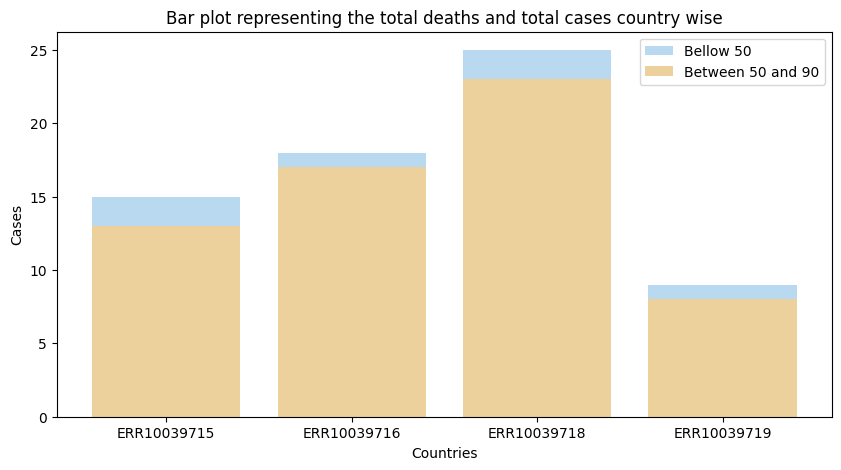

In [131]:
# Importing the matplotlib library
import matplotlib.pyplot as plt# Declaring the figure or the plot (y, x) or (width, height)
yellow = "#ecd19d"
blue = "#b9d9f0"

plt.figure(figsize=[10, 5])# Categorical data: Country names

samples = ['ERR10039715', 'ERR10039716', 'ERR10039718', 'ERR10039719']# Integer value interms of death counts
less_50 = [15, 18, 25, 9]# Integer value interms of total cases
more_50_less_90 = [2, 1, 2, 1]# Plotting both the total death and the total cases in a single plot. Formula total cases - total deaths
for i in range(len(samples)):    
    plt.bar(samples[i], more_50_less_90[i], bottom = less_50[i] -  more_50_less_90[i], color=blue)
    plt.bar(samples[i], less_50[i] - more_50_less_90[i], color=yellow)# Creating the legend of the bars in the plot
    plt.legend(labels = ['Bellow 50','Between 50 and 90'])# Giving the tilte for the plot
    plt.title("Bar plot representing the total deaths and total cases country wise")# Namimg the x and y axis
    plt.xlabel('Countries')
    plt.ylabel('Cases')# Saving the plot as a 'png'
    #plt.savefig('3BarPlot.png')# Displaying the bar plot

plt.show()

{'samples': ['ERR10039715', 'ERR10039716', 'ERR10039718', 'ERR10039719'], 'bellow_fifty': [15, 18, 25, 9], 'more_fifty': [0, 1, 0, 0]}


AttributeError: 'AxesSubplot' object has no attribute 'savefig'

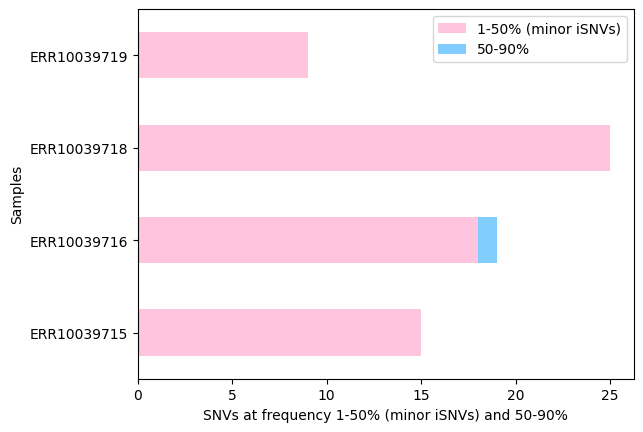

In [2]:
import pandas as pd

with open('/home/reusebio/tese/insaflu_snakemake/projects/covid_testing_5/main_result/proportions_iSNVs_graph.csv','r') as file:
    rows = file.readlines()
    dic = {
        'samples' : [],
        'bellow_fifty' : [],
        'more_fifty' : []
    }
    for row in rows[1:]:
        row = row[:-1]
        row = row.split(',')
        dic['samples'].append(row[0])
        dic['bellow_fifty'].append(int(row[1]))
        dic['more_fifty'].append(int(row[2]))
    print(dic)
df = pd.DataFrame({'1-50% (minor iSNVs)':dic['bellow_fifty'],
                   '50-90%':dic['more_fifty']},index=dic['samples'])

x = df.plot.barh(stacked=True,color = ["#ffc4de","#81cdff"], )
x.set_xlabel('SNVs at frequency 1-50% (minor iSNVs) and 50-90%')
x.set_ylabel('Samples')
x.savefig('proportions_iSNVs_graph')

In [16]:
with open('../config/snpeff.config' , 'r') as f:
    lines = f.readlines()
    joined = ''.join(lines)
    find = joined.find("SARS_CoV_2_COVID_19_Wuhan_Hu_1_MN908947.genome: SARS_CoV_2_COVID_19_Wuhan_Hu_1_MN908947\nSARS_CoV_2_COVID_19_Wuhan_Hu_1_MN908947.MN908947.3.codonTable : Bacterial_and_Plant_Plastid")
    print(find)

12109


In [11]:
import sys

file_path = "../projects/covid_testing_5/main_result/depth/ERR10039715.depth"
file_path = "../projects/flu_testing_BVictoria/main_result/depth/SRR10885405.depth"

last_pos = len(file_path) - file_path[::-1].index("/")
filename = file_path[last_pos:]
new_file = []
print(filename[-7])
with open(file_path, "r") as f:
    for line in f.readlines():
        if line.split()[0] == filename[-7]:
            new_file.append(line)
new_file
# with open(file_path, "w") as f:
#     f.writelines(new_file)   

5


['5\t1\t2121\n',
 '5\t2\t2105\n',
 '5\t3\t2124\n',
 '5\t4\t2090\n',
 '5\t5\t2179\n',
 '5\t6\t2241\n',
 '5\t7\t2291\n',
 '5\t8\t2298\n',
 '5\t9\t2319\n',
 '5\t10\t2363\n',
 '5\t11\t2545\n',
 '5\t12\t2586\n',
 '5\t13\t3190\n',
 '5\t14\t3238\n',
 '5\t15\t3272\n',
 '5\t16\t3323\n',
 '5\t17\t3288\n',
 '5\t18\t3436\n',
 '5\t19\t3804\n',
 '5\t20\t4240\n',
 '5\t21\t4460\n',
 '5\t22\t4509\n',
 '5\t23\t4533\n',
 '5\t24\t4511\n',
 '5\t25\t4622\n',
 '5\t26\t4604\n',
 '5\t27\t4612\n',
 '5\t28\t5007\n',
 '5\t29\t5031\n',
 '5\t30\t5066\n',
 '5\t31\t5035\n',
 '5\t32\t5255\n',
 '5\t33\t5279\n',
 '5\t34\t5303\n',
 '5\t35\t6528\n',
 '5\t36\t6538\n',
 '5\t37\t6604\n',
 '5\t38\t6648\n',
 '5\t39\t6880\n',
 '5\t40\t6921\n',
 '5\t41\t7142\n',
 '5\t42\t7329\n',
 '5\t43\t7261\n',
 '5\t44\t7364\n',
 '5\t45\t7459\n',
 '5\t46\t7627\n',
 '5\t47\t7628\n',
 '5\t48\t7821\n',
 '5\t49\t7808\n',
 '5\t50\t7904\n',
 '5\t51\t7744\n',
 '5\t52\t7888\n',
 '5\t53\t7910\n',
 '5\t54\t7893\n',
 '5\t55\t7888\n',
 '5\t56\t7883\n',
 

In [1]:
string = "/home/reusebio/tese/insaflu_snakemake/.snakemake/conda/b18fac3468db29b256f7bce43268530c_"
string[string.index('.snakemake'):]


'.snakemake/conda/b18fac3468db29b256f7bce43268530c_'

In [49]:
import sys
from Bio import SeqIO
from get_locus import get_locus
import csv
import re

def get_fasta_reference_concat(fasta_ref):
    concat_reference = []
    count = 0
    for record in SeqIO.parse(fasta_ref, "fasta"):
        if count == 0:
            concat_reference.append(record)
            start = fasta_ref.index('reference')
            end = fasta_ref.index('.fasta')
            concat_reference[0].id = fasta_ref[start+10:end]
        else:
            concat_reference[0].seq += record.seq
        count += 1
    return concat_reference[0]

def get_id_sequence_from_consensus(consensus,sample_name, value_list):
    concat_consensus = []
    count = 1

    starting_segment = value_list[0]
    for record in SeqIO.parse(consensus, "fasta"):
        if count == starting_segment:
            concat_consensus.append(record)
            concat_consensus[0].id = sample_name
        elif count in value_list:
            concat_consensus[0].seq += record.seq
        count += 1
    return concat_consensus[0]

def get_id_sequence_from_consensus_strict(consensus,sample_name, value_list):
    concat_consensus = []
    count = 1
    starting_segment = value_list[0]
    for record in SeqIO.parse(consensus, "fasta"):
        if count == starting_segment:
            concat_consensus.append(record)
            concat_consensus[0].id = sample_name
        elif count in value_list:
            concat_consensus[0].seq += record.seq
        count += 1
    return concat_consensus[0]

    


alignment = sys.argv[1]
reference_gb = sys.argv[2]
species = sys.argv[3]
output = sys.argv[4]
coverage_file = sys.argv[5]
output_only_90_plus = sys.argv[6]

# consensus = '../projects/flu_testing_BVictoria/sample_SRR10885405/snippy/SRR10885405_consensus.fasta ../projects/flu_testing_BVictoria/sample_SRR10885406/snippy/SRR10885406_consensus.fasta'.split(' ')
reference_gb = "../reference/B_Vic_B_Brisbane_60_2008.gbk"
species = "Flu"
output = "../projects/flu_testing_BVictoria/main_result/All_nt.fasta"
coverage_file = "../projects/flu_testing_BVictoria/main_result/coverage_translate.csv"
fasta_file = '../reference/B_Vic_B_Brisbane_60_2008.fasta'
output_only_90_plus = "../projects/flu_testing_BVictoria/main_result/All_nt_only_90plus.fasta"

with open(coverage_file, newline='') as csvfile:
            csv_reader = csv.reader(csvfile, delimiter=',')
            coverage_list = list(csv_reader)

for row in coverage_list:
    for value in range(len(row)-1, 0, -1):
        # print(row[value])
        if float(row[value]) > 90:
            row[value] = value
        else:
            row.pop(value)

coverage_dic = {}
for i in coverage_list:
    coverage_dic[i[0]] = i[1:]


fasta_reference_concat = get_fasta_reference_concat(fasta_file)
new_concat_file = [fasta_reference_concat]
new_concat_file_strict = [fasta_reference_concat]
if species == 'Flu':
    for file in consensus:
        sample_name = re.findall("(?<=/snippy/)(.*?)(?=_consensus.fasta)",file)[0]
        if len(coverage_dic[sample_name]) > 0:
            new_sequence = get_id_sequence_from_consensus(file,sample_name,coverage_dic[sample_name])
            new_concat_file.append(new_sequence)
        if len(coverage_dic[sample_name]) == 8:
            new_sequence = get_id_sequence_from_consensus_strict(file,sample_name,coverage_dic[sample_name])
            new_concat_file_strict.append(new_sequence)
    SeqIO.write(new_concat_file, output_only_90_plus, "fasta")
    SeqIO.write(new_concat_file_strict, output, "fasta")

else:
    for file in consensus:
        sample_name = re.findall("(?<=/snippy/)(.*?)(?=_consensus.fasta)",file)[0]
        if len(coverage_dic[sample_name]) == 1:
            new_sequence = get_id_sequence_from_consensus_strict(file,sample_name,coverage_dic[sample_name])
            new_concat_file_strict.append(new_sequence)
    SeqIO.write(new_concat_file_strict, output_only_90_plus, "fasta")
    SeqIO.write(new_concat_file_strict, output, "fasta")


4

In [51]:
file = '../projects/flu_testing_BVictoria/sample_SRR10885405/snippy/SRR10885405_consensus.fasta'
sample_name = re.findall("(?<=/snippy/)(.*?)(?=_consensus.fasta)",file)[0]
sample_name

'SRR10885405'

In [44]:
from Bio import SeqIO

genes = []
genbank_file = '../reference/monkeypox_MPXV_USA_2022_MA001_ON563414.gb'
handle_gb = open(genbank_file)
for record in SeqIO.parse(handle_gb, "genbank"):
    for features in record.features:
        if (features.type == 'CDS'):
            try:
                genes.append(features.qualifiers["gene"][0])
            except:
                genes.append(features.qualifiers["locus_tag"][0])
handle_gb.close()

genes


['MPXV-USA_2022_MA001-001',
 'MPXV-USA_2022_MA001-002',
 'MPXV-USA_2022_MA001-003',
 'MPXV-USA_2022_MA001-004',
 'MPXV-USA_2022_MA001-005',
 'MPXV-USA_2022_MA001-006',
 'MPXV-USA_2022_MA001-007',
 'MPXV-USA_2022_MA001-008',
 'MPXV-USA_2022_MA001-009',
 'MPXV-USA_2022_MA001-010',
 'MPXV-USA_2022_MA001-011',
 'MPXV-USA_2022_MA001-012',
 'MPXV-USA_2022_MA001-013',
 'MPXV-USA_2022_MA001-014',
 'MPXV-USA_2022_MA001-015',
 'MPXV-USA_2022_MA001-016',
 'MPXV-USA_2022_MA001-017',
 'MPXV-USA_2022_MA001-018',
 'MPXV-USA_2022_MA001-019',
 'MPXV-USA_2022_MA001-020',
 'MPXV-USA_2022_MA001-021',
 'MPXV-USA_2022_MA001-022',
 'MPXV-USA_2022_MA001-023',
 'MPXV-USA_2022_MA001-024',
 'MPXV-USA_2022_MA001-025',
 'MPXV-USA_2022_MA001-026',
 'MPXV-USA_2022_MA001-027',
 'MPXV-USA_2022_MA001-028',
 'MPXV-USA_2022_MA001-029',
 'MPXV-USA_2022_MA001-030',
 'MPXV-USA_2022_MA001-031',
 'MPXV-USA_2022_MA001-032',
 'MPXV-USA_2022_MA001-033',
 'MPXV-USA_2022_MA001-034',
 'MPXV-USA_2022_MA001-035',
 'MPXV-USA_2022_MA00

In [6]:
from Bio import SeqIO

reference_fasta = '/home/reusebio/tese/insaflu_snakemake/reference/SARS_CoV_2_COVID_19_Wuhan_Hu_1_MN908947.fasta'
consensus_file = '/home/reusebio/tese/insaflu_snakemake/align_samples/ERR10039715/snippy/snps.consensus.fa'
with open(reference_fasta, "r") as handle_fasta:
    dt_consensus = SeqIO.to_dict(SeqIO.parse(consensus_file, "fasta"))
    for record in SeqIO.parse(handle_fasta, "fasta"):
        if (record.id in dt_consensus and True):	### make mask
            ### get sequences
            vect_out_fasta_to_align = []
            record_id = record.id 
            record.id = record.id + "_ref"
            vect_out_fasta_to_align.append(record)
            vect_out_fasta_to_align.append(dt_consensus[record_id])
            print(vect_out_fasta_to_align)
            with open('test.fasta', "w") as handle_fasta_out_align:
                SeqIO.write(vect_out_fasta_to_align, handle_fasta_out_align, "fasta")

[SeqRecord(seq=Seq('ATTAAAGGTTTATACCTTCCCAGGTAACAAACCAACCAACTTTCGATCTCTTGT...AAA'), id='SARS_CoV_2_ref', name='SARS_CoV_2', description='SARS_CoV_2 Severe acute respiratory syndrome coronavirus 2 isolate Wuhan-Hu-1, complete genome', dbxrefs=[]), SeqRecord(seq=Seq('ATTAAAGGTTTATACCTTCCCAGGTAACAAACCAACCAACTTTCGATCTCTTGT...AAA'), id='SARS_CoV_2', name='SARS_CoV_2', description='SARS_CoV_2 Severe acute respiratory syndrome coronavirus 2 isolate Wuhan-Hu-1, complete genome', dbxrefs=[])]


In [ ]:
import sys
from Bio import SeqIO

consensus_file = sys.argv[1]
output_file = sys.argv[2]

dt_consensus = SeqIO.to_dict(SeqIO.parse(consensus_file, "fasta"))


In [4]:
from Bio import SeqIO

def get_locus(genbank_file):
    """
    The get_locus function takes a genbank file and returns the locus number of that record.
    If there is only one record in the genbank file, it will return the possible_name. If there are multiple records, 
    it will return a list of all locus numbers.
    
    :param genbank_file: Open the genbank file, and then parse it using seqio
    :param possible_name: Determine if the file is a single genbank file or not
    :return: A list of locus numbers
    :doc-author: Trelent
    """
    locus = []
    handle_gb = open(genbank_file)
    for record in SeqIO.parse(handle_gb, "genbank"):
        locus.append(record.name)
    return locus
get_locus('/home/reusebio/tese/insaflu_snakemake/reference/SARS_CoV_2_COVID_19_Wuhan_Hu_1_MN908947.gb')

['SARS_CoV_2']

In [7]:
file_path = "align_samples/{sample}/medaka/{REFERENCE_NAME}.depth"
last_pos = len(file_path) - file_path[::-1].index("/")
path = file_path[:last_pos]
path

'align_samples/{sample}/medaka/'